In [4]:
import pandas as pd; from scipy import stats;

In [5]:
from phcalc import calc_pH

In [6]:
#file is named by 2 digit date m, d, y and short name of VELMA run created in DOC check which is the precursor for the pH calculation
data_df=pd.read_csv('111921_WQX_Loss_20APR21A.csv') #can change path -cp with true file directory but copying in this folder
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  Step  \
0           0  1998                                0.052350     0   
1           1  1998                                0.010933     1   
2           2  1998                                0.011182     2   
3           3  1998                                0.011572     3   
4           4  1998                                0.010944     4   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000036   
1                                0.000008   
2                                0.000008   
3                                0.000009   
4                                0.000008   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001555   
1                                0.000323   
2                                0.000331   
3                                0.000343   
4                                0.000325   

   NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.000173  0.149571            2.6375   
1                                0.000033  0.031238            3.3125   
2                                0.000031  0.031947            0.7625   
3                                0.000030  0.033064            0.0875   
4                                0.000026  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [7]:
#Check for any zero runoff days should equal 0
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, Year, DOC_Loss(gC/day/m2)_Delineated_Average, Step, NH4_Loss(gN/day/m2)_Delineated_Average, Runoff_All(mm/day)_Delineated_Average, DON_Loss(gN/day/m2)_Delineated_Average, NO3_Loss(gN/day/m2)_Delineated_Average, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [8]:
pools_di=pd.read_csv('BC20APR21AWQDI_pHcalc_UP.csv') #need to change paths or copy and paste file in dir

In [9]:
#VELMA Simulation focusing on Water Quality Parameters Before renaming as concentrations
pools_di.drop(columns={'Unnamed: 0','Criteria', 'Condition'})

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               4.924307                          179.364744   
1                               4.925284                          179.523730   
2                               4.926286                          179.685625   
3                               4.927284                          179.846649   
4                               4.928269                          179.999629   
...                                  ...                                 ...   
1973                            6.314049                         3907.456055   
1974                            6.314330                         3907.571150   
1975                            6.314566                         3907.727748   
1976                            6.314829                         3908.136161   
1977                            6.315092                         3908.251256   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                               0.620367                            0.151210   
1                               0.624146                            0.152441   
2                               0.619998                            0.153253   
3                               0.616770                            0.153725   
4                               0.615894                            0.154074   
...                                  ...                                 ...   
1973                            4.675421                            2.760186   
1974                            4.692891                            2.760113   
1975                            4.709440                            2.760010   
1976                            4.726525                            2.759928   
1977                            4.742385                            2.759813   

      Step  Runoff_All(mm/day)_Delineated_Average  Sfc_Water_Temp_C  
0     1309                               0.033263         20.112500  
1     1310                               0.049179         19.737500  
2     1311                               0.059759         19.962502  
3     1312                               0.043197         19.812500  
4     1313                               0.033944         19.287498  
...    ...                                    ...               ...  
1973  3282                               0.088845         -1.562500  
1974  3283                               0.088433         -2.837500  
1975  3284                               0.087845         -0.812500  
1976  3285                               0.089226          4.512500  
1977  3286                               0.086422         -2.087500  

[1978 rows x 7 columns]

In [10]:
#Defining Percentiles list for tails and distrubition interval
perc = [0.1, 0.25, 0.5, .75, .9]

In [11]:
pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'}).describe(percentiles =perc)

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.543138                         1847.930416   
std                              0.403139                         1187.898156   
min                              4.924307                          179.364744   
10%                              5.013616                          191.091546   
25%                              5.197365                          807.014138   
50%                              5.485376                         1743.304095   
75%                              5.892257                         2938.636039   
90%                              6.093331                         3414.037040   
max                              6.315092                         3908.251256   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             3.677796                            1.116060   
std                              1.734313                            0.810944   
min                              0.595342                            0.151210   
10%                              1.021928                            0.184986   
25%                              2.527622                            0.597463   
50%                              3.694649                            0.790161   
75%                              4.908126                            1.843516   
90%                              5.994847                            2.667455   
max                              7.343117                            3.413058   

              Step  Runoff_All(mm/day)_Delineated_Average  
count  1978.000000                            1978.000000  
mean   2297.500000                               0.205125  
std     571.143736                               0.697596  
min    1309.000000                               0.002260  
10%    1506.700000                               0.005910  
25%    1803.250000                               0.051539  
50%    2297.500000                               0.115309  
75%    2791.750000                               0.229124  
90%    3088.300000                               0.496839  
max    3286.000000                              29.388712

In [12]:
#Loss Stats 
data_df.describe(percentiles=perc).drop(columns='Year')

Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average         Step  \
count  3287.000000                             3287.000000  3287.000000   
mean   1643.000000                                0.015237  1643.000000   
std     949.019494                                0.042300   949.019494   
min       0.000000                                0.000029     0.000000   
10%     328.600000                                0.000075   328.600000   
25%     821.500000                                0.000193   821.500000   
50%    1643.000000                                0.003675  1643.000000   
75%    2464.500000                                0.019601  2464.500000   
90%    2957.400000                                0.038432  2957.400000   
max    3286.000000                                1.820812  3286.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             6.601599e-06   
std                              1.325734e-05   
min                              6.251203e-08   
10%                              9.847706e-08   
25%                              1.837206e-07   
50%                              2.510358e-06   
75%                              7.793907e-06   
90%                              1.576521e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.192166   
std                                 0.731214   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009843   
50%                                 0.066563   
75%                                 0.182819   
90%                                 0.469919   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.197756e-05   
std                              4.630453e-05   
min                              4.437417e-07   
10%                              1.254997e-06   
25%                              2.938069e-06   
50%                              1.042756e-05   
75%                              2.403923e-05   
90%                              5.031524e-05   
max                              1.554523e-03   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.287000e+03  3287.000000       3287.000000   
mean                             4.429088e-06     0.043535         11.248536   
std                              9.098820e-06     0.120858          6.931090   
min                              6.078645e-10     0.000084        -10.562500   
10%                              2.022193e-08     0.000214          2.262500   
25%                              5.444414e-08     0.000551          5.787500   
50%                              1.405365e-06     0.010501         11.112499   
75%                              5.927934e-06     0.056002         17.712502   
90%                              1.304791e-05     0.109807         20.412498   
max                              2.999136e-04     5.202320         24.087502   

               CO2  Alk_140  
count  3287.000000   3287.0  
mean      0.010884    140.0  
std       0.030214      0.0  
min       0.000021    140.0  
10%       0.000054    140.0  
25%       0.000138    140.0  
50%       0.002625    140.0  
75%       0.014000    140.0  
90%       0.027452    140.0  
max       1.300580    140.0

In [13]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(2.9451126465573907e-05, 1.820811867713928), mean=0.015237260912951836, variance=0.001789308927443058, skewness=25.120781755619152, kurtosis=1015.3157456718683)

In [14]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(8.414607561592546e-05, 5.202319622039795), mean=0.043535031179862384, variance=0.014606603489331089, skewness=25.120781755619156, kurtosis=1015.315745671869)

In [15]:
"""these are corrected columns needed for pH calculation...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0373928514974457, 2.6374998, 0.1495714059897831, 140.0]

In [16]:
215/(12*0.35)

51.1904761904762

In [17]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.8498375340328569
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 8.180891339256767e-07
SQRT of Alpha= 0.0009044827991320104
A value 3.0435996878567746
B value 0.43429448190325176
C value 0.0018089655982640208

CO2 Estimate 0.17748870463533636
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 1.735880656036776e-07
SQRT of Alpha= 0.0004166390111399527
A value 3.380240068210621
B value 0.43429448190325176
C value 0.0008332780222799054

CO2 Estimate 0.18151812618235227
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 1.6700656262476767e-07
SQRT of Alpha= 0.0004086643642706906
A value 3.388633231325237
B value 0.43429448190325176
C value 0.0008173287285413812

CO2 Estimate 0.1878648929830091
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 1.6997878015758345e-07
SQRT of Alpha= 0.0004122848289199876
A value 3.38

pkw= 1e-14
Alpha value= 2.1234147040377194e-08
SQRT of Alpha= 0.00014571941202316593
A value 3.836482589801859
B value 0.43429448190325176
C value 0.00029143882404633186

CO2 Estimate 0.016842741978824998
Exponent value 5.9903277072500005
H2CO3 value 1.0225211334185413e-06
pkw= 1e-14
Alpha value= 1.722206961806418e-08
SQRT of Alpha= 0.00013123288314315199
A value 3.8819573297601173
B value 0.43429448190325176
C value 0.00026246576628630397

CO2 Estimate 0.015525702937420454
Exponent value 6.008892159271609
H2CO3 value 9.797332351699863e-07
pkw= 1e-14
Alpha value= 1.5211057167167102e-08
SQRT of Alpha= 0.00012333311464147453
A value 3.908920300734438
B value 0.43429448190325176
C value 0.00024666622928294906

CO2 Estimate 0.015147801038095455
Exponent value 5.976035047250001
H2CO3 value 1.0567322282475348e-06
pkw= 1e-14
Alpha value= 1.600717954403693e-08
SQRT of Alpha= 0.00012651948286345835
A value 3.897842591890723
B value 0.43429448190325176
C value 0.0002530389657269167

CO2 Estimate

Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 2.920325398390428e-08
SQRT of Alpha= 0.00017088959589133646
A value 3.7672843772121185
B value 0.43429448190325176
C value 0.0003417791917826729

CO2 Estimate 0.018171603978888638
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 2.4033629706691333e-08
SQRT of Alpha= 0.00015502783526415937
A value 3.8095903172084307
B value 0.43429448190325176
C value 0.00031005567052831874

CO2 Estimate 0.015143700988731816
Exponent value 5.873626088279041
H2CO3 value 1.3377467720970873e-06
pkw= 1e-14
Alpha value= 2.0258447115279456e-08
SQRT of Alpha= 0.00014233217175073053
A value 3.84669692398719
B value 0.43429448190325176
C value 0.00028466434350146106

CO2 Estimate 0.012868464631088638
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 1.7234110690030483e-08
SQRT of Alpha= 0.00013127875186042288
A value 3.8818055610127615
B 

CO2 Estimate 0.001706876818471673
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 2.2549059071121733e-09
SQRT of Alpha= 4.748584954607186e-05
A value 4.323435787840803
B value 0.43429448190325176
C value 9.497169909214372e-05

CO2 Estimate 0.0015835082324753915
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 2.10398402347923e-09
SQRT of Alpha= 4.5869205612035946e-05
A value 4.338478781152009
B value 0.43429448190325176
C value 9.173841122407189e-05

CO2 Estimate 0.0014754123067295833
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 1.9781727538915486e-09
SQRT of Alpha= 4.447665403210485e-05
A value 4.351867892065648
B value 0.43429448190325176
C value 8.89533080642097e-05

CO2 Estimate 0.0013798096490488692
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 1.8479210839170977e-09
SQRT of Alpha= 4.298745263349641e-05


A value 4.57823408791311
B value 0.43429448190325176
C value 5.2819697267755114e-05

CO2 Estimate 0.0006843284408406162
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 7.161433655075402e-10
SQRT of Alpha= 2.6760855096718047e-05
A value 4.57250001355545
B value 0.43429448190325176
C value 5.3521710193436094e-05

CO2 Estimate 0.0006742854932415324
Exponent value 6.001373227250001
H2CO3 value 9.968430211754252e-07
pkw= 1e-14
Alpha value= 6.721667882176509e-10
SQRT of Alpha= 2.5926179591633837e-05
A value 4.586261474920284
B value 0.43429448190325176
C value 5.185235918326767e-05

CO2 Estimate 0.0006667334980795511
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alpha value= 6.589336694447017e-10
SQRT of Alpha= 2.5669703337683932e-05
A value 4.590579150399509
B value 0.43429448190325176
C value 5.1339406675367865e-05

CO2 Estimate 0.0006600412707012329
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06


Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 1.4730724059074885e-09
SQRT of Alpha= 3.838062539755558e-05
A value 4.415887952881044
B value 0.43429448190325176
C value 7.676125079511117e-05

CO2 Estimate 0.0016481631477786736
Exponent value 5.944402825250001
H2CO3 value 1.1365725808912298e-06
pkw= 1e-14
Alpha value= 1.8732670426006204e-09
SQRT of Alpha= 4.328125509502492e-05
A value 4.363700153794735
B value 0.43429448190325176
C value 8.656251019004984e-05

CO2 Estimate 0.0015222661665114639
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 1.7276104548613315e-09
SQRT of Alpha= 4.1564533617753145e-05
A value 4.381277088213275
B value 0.43429448190325176
C value 8.312906723550629e-05

CO2 Estimate 0.0014082959680379575
Exponent value 5.933637031250001
H2CO3 value 1.1650993735571457e-06
pkw= 1e-14
Alpha value= 1.6408147501440784e-09
SQRT of Alpha= 4.050697162395726e-05
A value 4.39247022426067
B val

CO2 Estimate 0.007176277467331818
Exponent value 5.866907532684642
H2CO3 value 1.3586026811387132e-06
pkw= 1e-14
Alpha value= 9.749719807712342e-09
SQRT of Alpha= 9.874066947166371e-05
A value 4.005503932546266
B value 0.43429448190325176
C value 0.00019748133894332743

CO2 Estimate 0.005843245493120455
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 7.895426960788407e-09
SQRT of Alpha= 8.885621509375924e-05
A value 4.051312189844902
B value 0.43429448190325176
C value 0.00017771243018751848

CO2 Estimate 0.0048580572089204545
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 6.564236563636569e-09
SQRT of Alpha= 8.101997632458657e-05
A value 4.091407888060637
B value 0.43429448190325176
C value 0.00016203995264917314

CO2 Estimate 0.004218194377456818
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 5.54019320995373e-09
SQRT of Alpha= 7.44324741625168e-05
A val

SQRT of Alpha= 9.32906208479958e-05
A value 4.0301620166898635
B value 0.43429448190325176
C value 0.0001865812416959916

CO2 Estimate 0.006315837838752272
Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 8.098627275751428e-09
SQRT of Alpha= 8.999237343103818e-05
A value 4.045794294084678
B value 0.43429448190325176
C value 0.00017998474686207636

CO2 Estimate 0.0057288636597068185
Exponent value 5.88779343125
H2CO3 value 1.2948115619291286e-06
pkw= 1e-14
Alpha value= 7.417808903304009e-09
SQRT of Alpha= 8.612670261483374e-05
A value 4.064862179552611
B value 0.43429448190325176
C value 0.00017225340522966748

CO2 Estimate 0.005370268088690909
Exponent value 5.89095597725
H2CO3 value 1.2854169510790212e-06
pkw= 1e-14
Alpha value= 6.90304363304203e-09
SQRT of Alpha= 8.308455712731476e-05
A value 4.080479690748299
B value 0.43429448190325176
C value 0.00016616911425462952

CO2 Estimate 0.015725890989413637
Exponent value 5.911446355250001
H2CO3 

H2CO3 value 9.302519599084241e-07
pkw= 1e-14
Alpha value= 1.7122114864820193e-09
SQRT of Alpha= 4.137887729847221e-05
A value 4.383221296891475
B value 0.43429448190325176
C value 8.275775459694443e-05

CO2 Estimate 0.001787090235217414
Exponent value 6.01962731525
H2CO3 value 9.558124535127698e-07
pkw= 1e-14
Alpha value= 1.7081331023718694e-09
SQRT of Alpha= 4.132956692698182e-05
A value 4.3837391454612735
B value 0.43429448190325176
C value 8.265913385396363e-05

CO2 Estimate 0.0017315613314911552
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 1.681675751375921e-09
SQRT of Alpha= 4.1008240042410026e-05
A value 4.3871288690024715
B value 0.43429448190325176
C value 8.201648008482005e-05

CO2 Estimate 0.0016762084208954999
Exponent value 6.00813467525
H2CO3 value 9.814435489810529e-07
pkw= 1e-14
Alpha value= 1.645113941435606e-09
SQRT of Alpha= 4.0560004209018596e-05
A value 4.391902008606834
B value 0.43429448190325176
C value 8.1120008418037

B value 0.43429448190325176
C value 0.00014480053895785772

CO2 Estimate 0.0040582475681818185
Exponent value 5.93426038556956
H2CO3 value 1.1634282752823488e-06
pkw= 1e-14
Alpha value= 4.721489968918559e-09
SQRT of Alpha= 6.871309896168676e-05
A value 4.1629604643304265
B value 0.43429448190325176
C value 0.00013742619792337353

CO2 Estimate 0.003587066238615909
Exponent value 5.931156075486761
H2CO3 value 1.1717741810762457e-06
pkw= 1e-14
Alpha value= 4.203241604220405e-09
SQRT of Alpha= 6.483241167981031e-05
A value 4.1882078229173345
B value 0.43429448190325176
C value 0.00012966482335962062

CO2 Estimate 0.0031999642688568183
Exponent value 5.943117631250001
H2CO3 value 1.1399409859294848e-06
pkw= 1e-14
Alpha value= 3.6477804235797645e-09
SQRT of Alpha= 6.0396857729353474e-05
A value 4.218985655854062
B value 0.43429448190325176
C value 0.00012079371545870695

CO2 Estimate 0.0029335572069068183
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha va

Alpha value= 1.6624908584807563e-09
SQRT of Alpha= 4.0773653975094704e-05
A value 4.3896203670341665
B value 0.43429448190325176
C value 8.154730795018941e-05

CO2 Estimate 0.0011644938653758304
Exponent value 5.893089181250001
H2CO3 value 1.2791186134839292e-06
pkw= 1e-14
Alpha value= 1.4895357784900736e-09
SQRT of Alpha= 3.859450451152435e-05
A value 4.413474530308324
B value 0.43429448190325176
C value 7.71890090230487e-05

CO2 Estimate 0.0011190373201812192
Exponent value 5.89905796457596
H2CO3 value 1.26165913176674e-06
pkw= 1e-14
Alpha value= 1.4118536537944166e-09
SQRT of Alpha= 3.7574641100008086e-05
A value 4.42510515895211
B value 0.43429448190325176
C value 7.514928220001617e-05

CO2 Estimate 0.0010788116687999482
Exponent value 5.884160291525442
H2CO3 value 1.305688889164971e-06
pkw= 1e-14
Alpha value= 1.408602409453613e-09
SQRT of Alpha= 3.7531352353114226e-05
A value 4.425605786535129
B value 0.43429448190325176
C value 7.506270470622845e-05

CO2 Estimate 0.00103552798912

A value 4.412188760774125
B value 0.43429448190325176
C value 7.74178729410697e-05

CO2 Estimate 0.0011554664808216615
Exponent value 5.88519213125
H2CO3 value 1.3025903868631068e-06
pkw= 1e-14
Alpha value= 1.5051095302608406e-09
SQRT of Alpha= 3.879574113560457e-05
A value 4.411215947158985
B value 0.43429448190325176
C value 7.759148227120914e-05

CO2 Estimate 0.0011133836885058477
Exponent value 5.873626088279041
H2CO3 value 1.3377467720970873e-06
pkw= 1e-14
Alpha value= 1.489435435404247e-09
SQRT of Alpha= 3.8593204523649584e-05
A value 4.413489158999023
B value 0.43429448190325176
C value 7.718640904729917e-05

CO2 Estimate 0.0011640904985697842
Exponent value 5.8746057372500005
H2CO3 value 1.3347325839712387e-06
pkw= 1e-14
Alpha value= 1.5537595191324157e-09
SQRT of Alpha= 3.94177563939453e-05
A value 4.404308098815047
B value 0.43429448190325176
C value 7.88355127878906e-05

CO2 Estimate 0.005686836027654545
Exponent value 5.91964286525
H2CO3 value 1.203253503135095e-06
pkw= 1e-

Alpha value= 6.712683589154769e-10
SQRT of Alpha= 2.5908847116679602e-05
A value 4.58655191167662
B value 0.43429448190325176
C value 5.1817694233359204e-05

CO2 Estimate 0.000624160700728633
Exponent value 5.9424768972500015
H2CO3 value 1.1416240328901498e-06
pkw= 1e-14
Alpha value= 7.125668563373639e-10
SQRT of Alpha= 2.669394793464174e-05
A value 4.573587190939557
B value 0.43429448190325176
C value 5.338789586928348e-05

CO2 Estimate 0.0006199897225914438
Exponent value 5.96564157725
H2CO3 value 1.0823268259215043e-06
pkw= 1e-14
Alpha value= 6.710415085563512e-10
SQRT of Alpha= 2.5904468891609247e-05
A value 4.586625307442017
B value 0.43429448190325176
C value 5.1808937783218494e-05

CO2 Estimate 0.0006144708614946078
Exponent value 5.98960127525
H2CO3 value 1.0242329065886932e-06
pkw= 1e-14
Alpha value= 6.293712764826805e-10
SQRT of Alpha= 2.5087273197433804e-05
A value 4.6005465407445465
B value 0.43429448190325176
C value 5.017454639486761e-05

CO2 Estimate 0.000610764788701078

SQRT of Alpha= 3.9890329041111e-05
A value 4.3991323813349466
B value 0.43429448190325176
C value 7.9780658082222e-05

CO2 Estimate 0.0015315185624171753
Exponent value 6.00813467525
H2CO3 value 9.814435489810529e-07
pkw= 1e-14
Alpha value= 1.5031090132290727e-09
SQRT of Alpha= 3.876994987395615e-05
A value 4.411504760495971
B value 0.43429448190325176
C value 7.75398997479123e-05

CO2 Estimate 0.00168978741302536
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 1.8202730593188144e-09
SQRT of Alpha= 4.266465819995297e-05
A value 4.369931729287616
B value 0.43429448190325176
C value 8.532931639990595e-05

CO2 Estimate 0.003154990582668182
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 3.4684183253545476e-09
SQRT of Alpha= 5.889327911871225e-05
A value 4.229934263925956
B value 0.43429448190325176
C value 0.0001177865582374245

CO2 Estimate 0.004400762327938637
Exponent value 5.958197305250001
H2CO3 

SQRT of Alpha= 5.710743946708573e-05
A value 4.243307311910959
B value 0.43429448190325176
C value 0.00011421487893417146

CO2 Estimate 0.002395038543247727
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 3.182247248206453e-09
SQRT of Alpha= 5.641141062060453e-05
A value 4.2486330401951005
B value 0.43429448190325176
C value 0.00011282282124120905

CO2 Estimate 0.0022732361779977273
Exponent value 5.89042578125
H2CO3 value 1.2869871738942782e-06
pkw= 1e-14
Alpha value= 2.9256358043155255e-09
SQRT of Alpha= 5.408914682554649e-05
A value 4.266889868842267
B value 0.43429448190325176
C value 0.00010817829365109298

CO2 Estimate 0.00231782669525
Exponent value 5.91434573525
H2CO3 value 1.2180195659593493e-06
pkw= 1e-14
Alpha value= 2.823168265317398e-09
SQRT of Alpha= 5.3133494759119674e-05
A value 4.274631618220012
B value 0.43429448190325176
C value 0.00010626698951823935

CO2 Estimate 0.002245118145304793
Exponent value 5.90015933525
H2CO3 val

SQRT of Alpha= 0.00016562303776792745
A value 3.780879254026947
B value 0.43429448190325176
C value 0.0003312460755358549

CO2 Estimate 0.017034364244354543
Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 2.3067438983246378e-08
SQRT of Alpha= 0.0001518796858807865
A value 3.818500309743869
B value 0.43429448190325176
C value 0.000303759371761573

CO2 Estimate 0.01954901834961818
Exponent value 5.88008268125
H2CO3 value 1.3180057919179248e-06
pkw= 1e-14
Alpha value= 2.576572941110655e-08
SQRT of Alpha= 0.00016051706890890622
A value 3.794478779216732
B value 0.43429448190325176
C value 0.00032103413781781244

CO2 Estimate 0.02578863580771591
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 3.473054487161286e-08
SQRT of Alpha= 0.00018636132879868843
A value 3.729644201594279
B value 0.43429448190325176
C value 0.00037272265759737686

CO2 Estimate 0.02132758744629318
Exponent value 5.86737936725
H2CO3 value

B value 0.43429448190325176
C value 7.394833438999404e-05

CO2 Estimate 0.001322289306274313
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 1.3905363097474607e-09
SQRT of Alpha= 3.7289895544871944e-05
A value 4.428408833167232
B value 0.43429448190325176
C value 7.457979108974389e-05

CO2 Estimate 0.0013210057375828627
Exponent value 5.986707967250001
H2CO3 value 1.0310792162483818e-06
pkw= 1e-14
Alpha value= 1.3620715605665537e-09
SQRT of Alpha= 3.6906253678293516e-05
A value 4.432900037422056
B value 0.43429448190325176
C value 7.381250735658703e-05

CO2 Estimate 0.0012973762384174367
Exponent value 6.101589520838829
H2CO3 value 7.914263016211938e-07
pkw= 1e-14
Alpha value= 1.026787678181928e-09
SQRT of Alpha= 3.204352786729214e-05
A value 4.494259675828941
B value 0.43429448190325176
C value 6.408705573458428e-05

CO2 Estimate 0.0012887498583454132
Exponent value 6.11427213125
H2CO3 value 7.686486499924582e-07
pkw= 1e-14
Alpha value= 9.9

CO2 Estimate 0.002136367619606098
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 2.2356676785125535e-09
SQRT of Alpha= 4.728284761425176e-05
A value 4.325296375910322
B value 0.43429448190325176
C value 9.456569522850352e-05

CO2 Estimate 0.0020436438079469823
Exponent value 5.97533345525
H2CO3 value 1.058440732692228e-06
pkw= 1e-14
Alpha value= 2.1630858494453387e-09
SQRT of Alpha= 4.650898676003745e-05
A value 4.332463121879967
B value 0.43429448190325176
C value 9.30179735200749e-05

CO2 Estimate 0.0019942218658526413
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 2.148214186228558e-09
SQRT of Alpha= 4.634883155192327e-05
A value 4.333961209889461
B value 0.43429448190325176
C value 9.269766310384654e-05

CO2 Estimate 0.0023279903576000002
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 2.3764442114544326e-09
SQRT of Alpha= 4.874878676905132e-05
A value 4.31

B value 0.43429448190325176
C value 0.00019255189654008434

CO2 Estimate 0.005726645437563636
Exponent value 5.901265681250001
H2CO3 value 1.2552618177172073e-06
pkw= 1e-14
Alpha value= 7.188449361378082e-09
SQRT of Alpha= 8.478472363213836e-05
A value 4.071682391138583
B value 0.43429448190325176
C value 0.00016956944726427672

CO2 Estimate 0.004842560836597727
Exponent value 5.904614534741561
H2CO3 value 1.245619691665105e-06
pkw= 1e-14
Alpha value= 6.031999136152373e-09
SQRT of Alpha= 7.766594579448816e-05
A value 4.109769364666977
B value 0.43429448190325176
C value 0.00015533189158897632

CO2 Estimate 0.004832226141995454
Exponent value 5.905177015250001
H2CO3 value 1.2440074600932702e-06
pkw= 1e-14
Alpha value= 6.011335369500067e-09
SQRT of Alpha= 7.753280189377956e-05
A value 4.1105145211379375
B value 0.43429448190325176
C value 0.00015506560378755911

CO2 Estimate 0.007846228273390909
Exponent value 5.90687193125
H2CO3 value 1.2391619481260239e-06
pkw= 1e-14
Alpha value= 9.722

C value 0.001661717003157458

CO2 Estimate 0.45591696201787274
Exponent value 5.873626088279041
H2CO3 value 1.3377467720970873e-06
pkw= 1e-14
Alpha value= 6.099014542837197e-07
SQRT of Alpha= 0.000780961877612294
A value 3.107370165542299
B value 0.43429448190325176
C value 0.001561923755224588

CO2 Estimate 0.35145368378657726
Exponent value 5.869757107250001
H2CO3 value 1.349717543219663e-06
pkw= 1e-14
Alpha value= 4.7436321263591933e-07
SQRT of Alpha= 0.0006887403085604322
A value 3.161944499164969
B value 0.43429448190325176
C value 0.0013774806171208643

CO2 Estimate 0.30091576665252723
Exponent value 5.86880229794784
H2CO3 value 1.3526882016226398e-06
pkw= 1e-14
Alpha value= 4.0704521723310495e-07
SQRT of Alpha= 0.0006380009539437264
A value 3.1951786719180433
B value 0.43429448190325176
C value 0.0012760019078874528

CO2 Estimate 0.26209736484792046
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 3.4903766908854773e-07
SQRT of Alpha= 0.000

CO2 Estimate 0.06310680696692045
Exponent value 6.056613933919508
H2CO3 value 8.777807776450177e-07
pkw= 1e-14
Alpha value= 5.5393952094117455e-08
SQRT of Alpha= 0.00023535919802318637
A value 3.6282688244546573
B value 0.43429448190325176
C value 0.00047071839604637274

CO2 Estimate 0.06166502966412273
Exponent value 6.021959375172089
H2CO3 value 9.506937194060471e-07
pkw= 1e-14
Alpha value= 5.862456640866907e-08
SQRT of Alpha= 0.0002421251048707446
A value 3.615960178168441
B value 0.43429448190325176
C value 0.0004842502097414892

CO2 Estimate 0.06018136174405682
Exponent value 5.99914176725
H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alpha value= 6.03004169660703e-08
SQRT of Alpha= 0.00024556143216325786
A value 3.609839842392301
B value 0.43429448190325176
C value 0.0004911228643265157

CO2 Estimate 0.058680926993875
Exponent value 5.98526876525
H2CO3 value 1.0345017620997845e-06
pkw= 1e-14
Alpha value= 6.070553237681249e-08
SQRT of Alpha= 0.0002463849272516736
A value 3.6083858

CO2 Estimate 0.16330461646732272
Exponent value 6.048349808015524
H2CO3 value 8.946438729734145e-07
pkw= 1e-14
Alpha value= 1.4609948455076364e-07
SQRT of Alpha= 0.00038222962280645337
A value 3.417675658142208
B value 0.43429448190325176
C value 0.0007644592456129067

CO2 Estimate 0.153030949197225
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alpha value= 1.5123842066046161e-07
SQRT of Alpha= 0.0003888938424049185
A value 3.4101689332493943
B value 0.43429448190325176
C value 0.000777787684809837

CO2 Estimate 0.1574655565396909
Exponent value 5.974633105250001
H2CO3 value 1.0601489675845303e-06
pkw= 1e-14
Alpha value= 1.6693695719567682e-07
SQRT of Alpha= 0.0004085791932975501
A value 3.3887237533818375
B value 0.43429448190325176
C value 0.0008171583865951002

CO2 Estimate 0.17397878268225456
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 1.8117198659981244e-07
SQRT of Alpha= 0.0004256430271951045
A value 

CO2 Estimate 1.0016361590136158
Exponent value 5.92262918525
H2CO3 value 1.1950080056815688e-06
pkw= 1e-14
Alpha value= 1.1969632388014077e-06
SQRT of Alpha= 0.0010940581514715787
A value 2.9609595937319892
B value 0.43429448190325176
C value 0.0021881163029431575

CO2 Estimate 0.737945416143959
Exponent value 5.92808281540396
H2CO3 value 1.1800955823409458e-06
pkw= 1e-14
Alpha value= 8.708461356002369e-07
SQRT of Alpha= 0.000933191371370437
A value 3.0300292855057283
B value 0.43429448190325176
C value 0.001866382742740874

CO2 Estimate 0.921560257866784
Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 1.0644566905459184e-06
SQRT of Alpha= 0.0010317251041561015
A value 2.986436001983453
B value 0.43429448190325176
C value 0.002063450208312203

CO2 Estimate 2.665701140831041
Exponent value 5.951560195250001
H2CO3 value 1.1179948545196777e-06
pkw= 1e-14
Alpha value= 2.980240169136338e-06
SQRT of Alpha= 0.0017263372118842652
A value 2.7628743679

A value 3.2521483410651038
B value 0.43429448190325176
C value 0.0011191328778038473

CO2 Estimate 0.23793510778190002
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 3.1650019580084464e-07
SQRT of Alpha= 0.0005625835011807978
A value 3.2498130084865036
B value 0.43429448190325176
C value 0.0011251670023615956

CO2 Estimate 0.28350777537017496
Exponent value 5.87707662725
H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 3.762602662456581e-07
SQRT of Alpha= 0.0006134005756808988
A value 3.2122558207648138
B value 0.43429448190325176
C value 0.0012268011513617977

CO2 Estimate 0.8004550011707567
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 1.0635477042198223e-06
SQRT of Alpha= 0.0010312844923782295
A value 2.9866215127702396
B value 0.43429448190325176
C value 0.002062568984756459

CO2 Estimate 2.1437751492122548
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14

Exponent value 5.97323613125
H2CO3 value 1.0635645878444538e-06
pkw= 1e-14
Alpha value= 2.5316767903399263e-07
SQRT of Alpha= 0.000503157707914718
A value 3.2982958699299525
B value 0.43429448190325176
C value 0.001006315415829436

CO2 Estimate 0.5386613744806932
Exponent value 5.953538287250001
H2CO3 value 1.1129142743426764e-06
pkw= 1e-14
Alpha value= 5.994839426966093e-07
SQRT of Alpha= 0.0007742634840263419
A value 3.1111112225391553
B value 0.43429448190325176
C value 0.0015485269680526837

CO2 Estimate 0.9579351171851136
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 1.053096698733847e-06
SQRT of Alpha= 0.0010262049983964447
A value 2.9887658743320586
B value 0.43429448190325176
C value 0.0020524099967928894

CO2 Estimate 1.161161858540075
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 1.2488403434884417e-06
SQRT of Alpha= 0.0011175152542531317
A value 2.951746539969855
B value 0.43429448190

CO2 Estimate 0.39625296054722275
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 3.6726741699380976e-07
SQRT of Alpha= 0.0006060259210576803
A value 3.2175087997090257
B value 0.43429448190325176
C value 0.0012120518421153605

CO2 Estimate 0.3624910355678614
Exponent value 6.01962731525
H2CO3 value 9.558124535127698e-07
pkw= 1e-14
Alpha value= 3.464734560825023e-07
SQRT of Alpha= 0.0005886199589569676
A value 3.2301650159062762
B value 0.43429448190325176
C value 0.0011772399179139352

CO2 Estimate 0.33402304443252273
Exponent value 6.00586968125
H2CO3 value 9.865754829351352e-07
pkw= 1e-14
Alpha value= 3.295389563724802e-07
SQRT of Alpha= 0.0005740548374262517
A value 3.241046619006073
B value 0.43429448190325176
C value 0.0011481096748525033

CO2 Estimate 0.39211347360502274
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 4.197151914722241e-07
SQRT of Alpha= 0.000647854298027129
A value 3.18852265566

SQRT of Alpha= 0.0007440861509370242
A value 3.1283767785528935
B value 0.43429448190325176
C value 0.0014881723018740484

CO2 Estimate 0.4232466801420409
Exponent value 5.909721631250001
H2CO3 value 1.2310575861743383e-06
pkw= 1e-14
Alpha value= 5.210410464119632e-07
SQRT of Alpha= 0.0007218317299841862
A value 3.1415640313175652
B value 0.43429448190325176
C value 0.0014436634599683724

CO2 Estimate 0.38265326217590906
Exponent value 5.901265681250001
H2CO3 value 1.2552618177172073e-06
pkw= 1e-14
Alpha value= 4.803300394343508e-07
SQRT of Alpha= 0.0006930584675439372
A value 3.1592301260510913
B value 0.43429448190325176
C value 0.0013861169350878745

CO2 Estimate 0.3488259329521023
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 4.3112250027921814e-07
SQRT of Alpha= 0.0006565991930235813
A value 3.1826996553648583
B value 0.43429448190325176
C value 0.0013131983860471626

CO2 Estimate 0.32149007326209544
Exponent value 5.9232301752500005
H2CO3

Alpha value= 6.547940766882243e-07
SQRT of Alpha= 0.000809193472964423
A value 3.0919476289498813
B value 0.43429448190325176
C value 0.001618386945928846

CO2 Estimate 0.4532329992137159
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 5.980575297687365e-07
SQRT of Alpha= 0.0007733417936260374
A value 3.111628518658497
B value 0.43429448190325176
C value 0.0015466835872520747

CO2 Estimate 0.5065167455800932
Exponent value 5.893625587250001
H2CO3 value 1.2775397231750062e-06
pkw= 1e-14
Alpha value= 6.470952729318973e-07
SQRT of Alpha= 0.0008044223224972671
A value 3.094515886356158
B value 0.43429448190325176
C value 0.0016088446449945342

CO2 Estimate 0.6148577123493317
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 7.678587910172873e-07
SQRT of Alpha= 0.0008762755223200562
A value 3.05735931962004
B value 0.43429448190325176
C value 0.0017525510446401123

CO2 Estimate 0.6202053786678727
Exponent value 

CO2 Estimate 0.07370991825863636
Exponent value 5.92747188125
H2CO3 value 1.1817568238760648e-06
pkw= 1e-14
Alpha value= 8.710720888949046e-08
SQRT of Alpha= 0.0002951393042098772
A value 3.5299729509039013
B value 0.43429448190325176
C value 0.0005902786084197544

CO2 Estimate 0.07231062876858636
Exponent value 5.93177444525
H2CO3 value 1.1701069388139957e-06
pkw= 1e-14
Alpha value= 8.461117847212584e-08
SQRT of Alpha= 0.0002908800069996662
A value 3.5362861280073683
B value 0.43429448190325176
C value 0.0005817600139993324

CO2 Estimate 0.07103368875800227
Exponent value 5.954200135250001
H2CO3 value 1.1112195277075445e-06
pkw= 1e-14
Alpha value= 7.893403207299199e-08
SQRT of Alpha= 0.00028095201026686386
A value 3.551367856095571
B value 0.43429448190325176
C value 0.0005619040205337277

CO2 Estimate 0.069917772303925
Exponent value 5.939291857250001
H2CO3 value 1.1500272807895741e-06
pkw= 1e-14
Alpha value= 8.040735556154746e-08
SQRT of Alpha= 0.0002835619078112352
A value 3.547352

SQRT of Alpha= 0.00028121274893024023
A value 3.55096499423349
B value 0.43429448190325176
C value 0.0005624254978604805

CO2 Estimate 0.07317570044187272
Exponent value 5.966325781250001
H2CO3 value 1.080623029651281e-06
pkw= 1e-14
Alpha value= 7.907535710835107e-08
SQRT of Alpha= 0.00028120340877797176
A value 3.5509794190558757
B value 0.43429448190325176
C value 0.0005624068175559435

CO2 Estimate 0.07205118134907955
Exponent value 5.97323613125
H2CO3 value 1.0635645878444538e-06
pkw= 1e-14
Alpha value= 7.663109499523979e-08
SQRT of Alpha= 0.0002768232197544848
A value 3.5577974843442406
B value 0.43429448190325176
C value 0.0005536464395089696

CO2 Estimate 0.07094389021202954
Exponent value 5.95552755725
H2CO3 value 1.1078282682132512e-06
pkw= 1e-14
Alpha value= 7.859365703390371e-08
SQRT of Alpha= 0.00028034560284388927
A value 3.552306251320832
B value 0.43429448190325176
C value 0.0005606912056877785

CO2 Estimate 0.06967323209316137
Exponent value 5.93301491896356
H2CO3 value

SQRT of Alpha= 0.0005535040286597737
A value 3.2568792137765104
B value 0.43429448190325176
C value 0.0011070080573195474

CO2 Estimate 0.2572911053702409
Exponent value 5.961562435250001
H2CO3 value 1.0925405495637868e-06
pkw= 1e-14
Alpha value= 2.8110097565907717e-07
SQRT of Alpha= 0.0005301895657772578
A value 3.275568823509659
B value 0.43429448190325176
C value 0.0010603791315545155

CO2 Estimate 0.27180706791869774
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 2.835099241270371e-07
SQRT of Alpha= 0.0005324564997509535
A value 3.2737158671189155
B value 0.43429448190325176
C value 0.001064912999501907

CO2 Estimate 0.2602484476353409
Exponent value 5.9739339972500005
H2CO3 value 1.061856922711082e-06
pkw= 1e-14
Alpha value= 2.7634662574639924e-07
SQRT of Alpha= 0.000525686813365524
A value 3.2792729169408963
B value 0.43429448190325176
C value 0.001051373626731048

CO2 Estimate 0.29624512346533866
Exponent value 5.99251445525
H2CO3 val

CO2 Estimate 0.6695775702208636
Exponent value 5.86880229794784
H2CO3 value 1.3526882016226398e-06
pkw= 1e-14
Alpha value= 9.057296893089168e-07
SQRT of Alpha= 0.0009516983184333766
A value 3.0215006980477406
B value 0.43429448190325176
C value 0.0019033966368667533

CO2 Estimate 0.751283588250734
Exponent value 5.863177681250001
H2CO3 value 1.3703210172369235e-06
pkw= 1e-14
Alpha value= 1.029499700885152e-06
SQRT of Alpha= 0.0010146426468886235
A value 2.9936868876137694
B value 0.43429448190325176
C value 0.002029285293777247

CO2 Estimate 0.7011719628587932
Exponent value 5.865499531250001
H2CO3 value 1.3630144773586628e-06
pkw= 1e-14
Alpha value= 9.557075464945259e-07
SQRT of Alpha= 0.0009776029595365012
A value 3.009837492342492
B value 0.43429448190325176
C value 0.0019552059190730024

CO2 Estimate 1.3398329497544774
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 1.7720524728593066e-06
SQRT of Alpha= 0.0013311846126136324
A value 2.875

CO2 Estimate 0.6317840768145272
Exponent value 5.916687595250001
H2CO3 value 1.2114692767064332e-06
pkw= 1e-14
Alpha value= 7.653870085731369e-07
SQRT of Alpha= 0.000874863994328911
A value 3.05805945681019
B value 0.43429448190325176
C value 0.001749727988657822

CO2 Estimate 0.600987900193634
Exponent value 6.00286707725
H2CO3 value 9.934200539409684e-07
pkw= 1e-14
Alpha value= 5.970334422282293e-07
SQRT of Alpha= 0.0007726793916161018
A value 3.1120006708101835
B value 0.43429448190325176
C value 0.0015453587832322036

CO2 Estimate 0.6995053792541659
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 7.487450722270544e-07
SQRT of Alpha= 0.0008653005675642738
A value 3.0628330114242814
B value 0.43429448190325176
C value 0.0017306011351285477

CO2 Estimate 0.9574595983926341
Exponent value 5.921430931250001
H2CO3 value 1.1983096832232253e-06
pkw= 1e-14
Alpha value= 1.147333118048914e-06
SQRT of Alpha= 0.0010711363676250162
A value 2.9701552351

C value 0.0008698121250370795

CO2 Estimate 0.16417305964927953
Exponent value 5.944402825250001
H2CO3 value 1.1365725808912298e-06
pkw= 1e-14
Alpha value= 1.8659460811839145e-07
SQRT of Alpha= 0.0004319659802789931
A value 3.3645504549417633
B value 0.43429448190325176
C value 0.0008639319605579862

CO2 Estimate 0.16108516591612954
Exponent value 5.958197305250001
H2CO3 value 1.1010389805356328e-06
pkw= 1e-14
Alpha value= 1.7736105685970854e-07
SQRT of Alpha= 0.00042114256120666377
A value 3.375570866005162
B value 0.43429448190325176
C value 0.0008422851224133275

CO2 Estimate 0.16010555366126591
Exponent value 6.01885244525
H2CO3 value 9.575193402860725e-07
pkw= 1e-14
Alpha value= 1.5330417411787173e-07
SQRT of Alpha= 0.000391540769419829
A value 3.4072230100754894
B value 0.43429448190325176
C value 0.000783081538839658

CO2 Estimate 0.15673821779911365
Exponent value 5.99914176725
H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alpha value= 1.5704827289273e-07
SQRT of Alpha= 0.00039

CO2 Estimate 0.4081394789474341
Exponent value 5.93676618125
H2CO3 value 1.1567348462368523e-06
pkw= 1e-14
Alpha value= 4.7210916742344914e-07
SQRT of Alpha= 0.000687102006563399
A value 3.162978783174796
B value 0.43429448190325176
C value 0.001374204013126798

CO2 Estimate 0.37780748196429775
Exponent value 5.911446355250001
H2CO3 value 1.226178352838118e-06
pkw= 1e-14
Alpha value= 4.632593659248996e-07
SQRT of Alpha= 0.0006806315933931509
A value 3.1670878957958073
B value 0.43429448190325176
C value 0.0013612631867863018

CO2 Estimate 0.3495129647773568
Exponent value 5.91260238125
H2CO3 value 1.222918792306514e-06
pkw= 1e-14
Alpha value= 4.274259827809944e-07
SQRT of Alpha= 0.0006537782366988017
A value 3.18456954052979
B value 0.43429448190325176
C value 0.0013075564733976033

CO2 Estimate 0.3632087889429796
Exponent value 5.991784297250001
H2CO3 value 1.0190974215050868e-06
pkw= 1e-14
Alpha value= 3.701451502797758e-07
SQRT of Alpha= 0.0006083955541255835
A value 3.2158139682314

Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.181192916544113e-06
SQRT of Alpha= 0.0010868269947623278
A value 2.963839583052526
B value 0.43429448190325176
C value 0.0021736539895246556

CO2 Estimate 0.832412246759834
Exponent value 5.869757107250001
H2CO3 value 1.349717543219663e-06
pkw= 1e-14
Alpha value= 1.1235214226426432e-06
SQRT of Alpha= 0.001059962934560753
A value 2.9747093211476647
B value 0.43429448190325176
C value 0.002119925869121506

CO2 Estimate 0.7444472572246137
Exponent value 5.860886881250001
H2CO3 value 1.3775682312328515e-06
pkw= 1e-14
Alpha value= 1.0255269013810588e-06
SQRT of Alpha= 0.0010126830211774358
A value 2.99452647141762
B value 0.43429448190325176
C value 0.0020253660423548716

CO2 Estimate 0.8988854559985046
Exponent value 5.875097431250001
H2CO3 value 1.3332222985283698e-06
pkw= 1e-14
Alpha value= 1.1984141437600482e-06
SQRT of Alpha= 0.0010947210346750665
A value 2.960696537021614
B value 0.43429448190325

CO2 Estimate 0.6710309777166932
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 7.615445071664046e-07
SQRT of Alpha= 0.0008726651747184625
A value 3.0591523549939543
B value 0.43429448190325176
C value 0.001745330349436925

CO2 Estimate 0.6110613633479364
Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 7.058120769665784e-07
SQRT of Alpha= 0.0008401262268055785
A value 3.0756554574063655
B value 0.43429448190325176
C value 0.001680252453611157

CO2 Estimate 0.5636762755064204
Exponent value 6.034585823758367
H2CO3 value 9.234516810917251e-07
pkw= 1e-14
Alpha value= 5.205278142079263e-07
SQRT of Alpha= 0.0007214761355775576
A value 3.141778029585577
B value 0.43429448190325176
C value 0.0014429522711551152

CO2 Estimate 0.5283377846920614
Exponent value 6.017306431250001
H2CO3 value 9.609340194311214e-07
pkw= 1e-14
Alpha value= 5.07697761061477e-07
SQRT of Alpha= 0.0007125291299739801
A value 3.147197

In [18]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [19]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [20]:
data_2.head()

pH_1T  Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  Step  \
0  8.232143           0  1998                                0.052350     0   
1  8.906361           1  1998                                0.010933     1   
2  8.923142           2  1998                                0.011182     2   
3  8.915472           3  1998                                0.011572     3   
4  8.908228           4  1998                                0.010944     4   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000036   
1                                0.000008   
2                                0.000008   
3                                0.000009   
4                                0.000008   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001555   
1                                0.000323   
2                                0.000331   
3                                0.000343   
4                                0.000325   

   NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.000173  0.149571            2.6375   
1                                0.000033  0.031238            3.3125   
2                                0.000031  0.031947            0.7625   
3                                0.000030  0.033064            0.0875   
4                                0.000026  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [21]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [22]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [23]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  \
1309  9.666670        1309  2001                                0.001380   
1310  9.543183        1310  2001                                0.001843   
1311  9.430500        1311  2001                                0.002381   
1312  9.552161        1312  2001                                0.001804   
1313  9.653242        1313  2001                                0.001441   

      Step  NH4_Loss(gN/day/m2)_Delineated_Average  \
1309  1309                            2.684104e-07   
1310  1310                            3.533252e-07   
1311  1311                            4.222566e-07   
1312  1312                            3.216673e-07   
1313  1313                            2.650185e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   

      NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                            2.677494e-07  0.003941         20.112500   
1310                            3.472516e-07  0.005267         19.737500   
1311                            4.345665e-07  0.006804         19.962502   
1312                            3.428827e-07  0.005153         19.812500   
1313                            2.838185e-07  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000985      140   Prefire    Meets  
1310  0.001317      140   Prefire    Meets  
1311  0.001701      140   Prefire    Meets  
1312  0.001288      140   Prefire    Meets  
1313  0.001029      140   Prefire    Meets

In [24]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [25]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

1709    7.949346
1932    7.812932
1933    7.653769
1934    7.887962
1954    7.668150
          ...   
3158    7.962958
3170    7.856040
3171    7.837386
3172    7.915993
3173    7.981026
Name: pH_1T, Length: 108, dtype: float64

In [26]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(6.500061502531737, 11.169478498447365), mean=8.898436020600652, variance=0.6515230472432709, skewness=1.1850569471827102, kurtosis=0.9538534241281855)

In [27]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(6.500061502531737, 11.506531424865294), mean=9.551509901731137, variance=1.1666639641295904, skewness=0.1306039965873871, kurtosis=-1.3604028070706427)

In [28]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'Year', 'DOC_Loss(gC/day/m2)_Delineated_Average',
       'Step', 'NH4_Loss(gN/day/m2)_Delineated_Average',
       'Runoff_All(mm/day)_Delineated_Average',
       'DON_Loss(gN/day/m2)_Delineated_Average',
       'NO3_Loss(gN/day/m2)_Delineated_Average', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [29]:
import seaborn as sns;

In [30]:
#upper bounds of the pH calculation
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [31]:
#lower bounds of the pH calculation
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [32]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [33]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(6.500061502531737, 8.5), mean=8.439062994019185, variance=0.02681853532154376, skewness=-3.723329707649902, kurtosis=18.051351291301675)

In [34]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  Step  \
1309    8.5        1309  2001                                0.001380  1309   
1310    8.5        1310  2001                                0.001843  1310   
1311    8.5        1311  2001                                0.002381  1311   
1312    8.5        1312  2001                                0.001804  1312   
1313    8.5        1313  2001                                0.001441  1313   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   

      NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                            2.677494e-07  0.003941         20.112500   
1310                            3.472516e-07  0.005267         19.737500   
1311                            4.345665e-07  0.006804         19.962502   
1312                            3.428827e-07  0.005153         19.812500   
1313                            2.838185e-07  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000985      140   Prefire    Meets  
1310  0.001317      140   Prefire    Meets  
1311  0.001701      140   Prefire    Meets  
1312  0.001288      140   Prefire    Meets  
1313  0.001029      140   Prefire    Meets

In [35]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(6.500061502531737, 8.5), mean=8.398871546364248, variance=0.04048088163822676, skewness=-2.7478685497759208, kurtosis=9.916770208967254)

In [36]:
sns.set(palette='deep')
import matplotlib.pyplot as plt

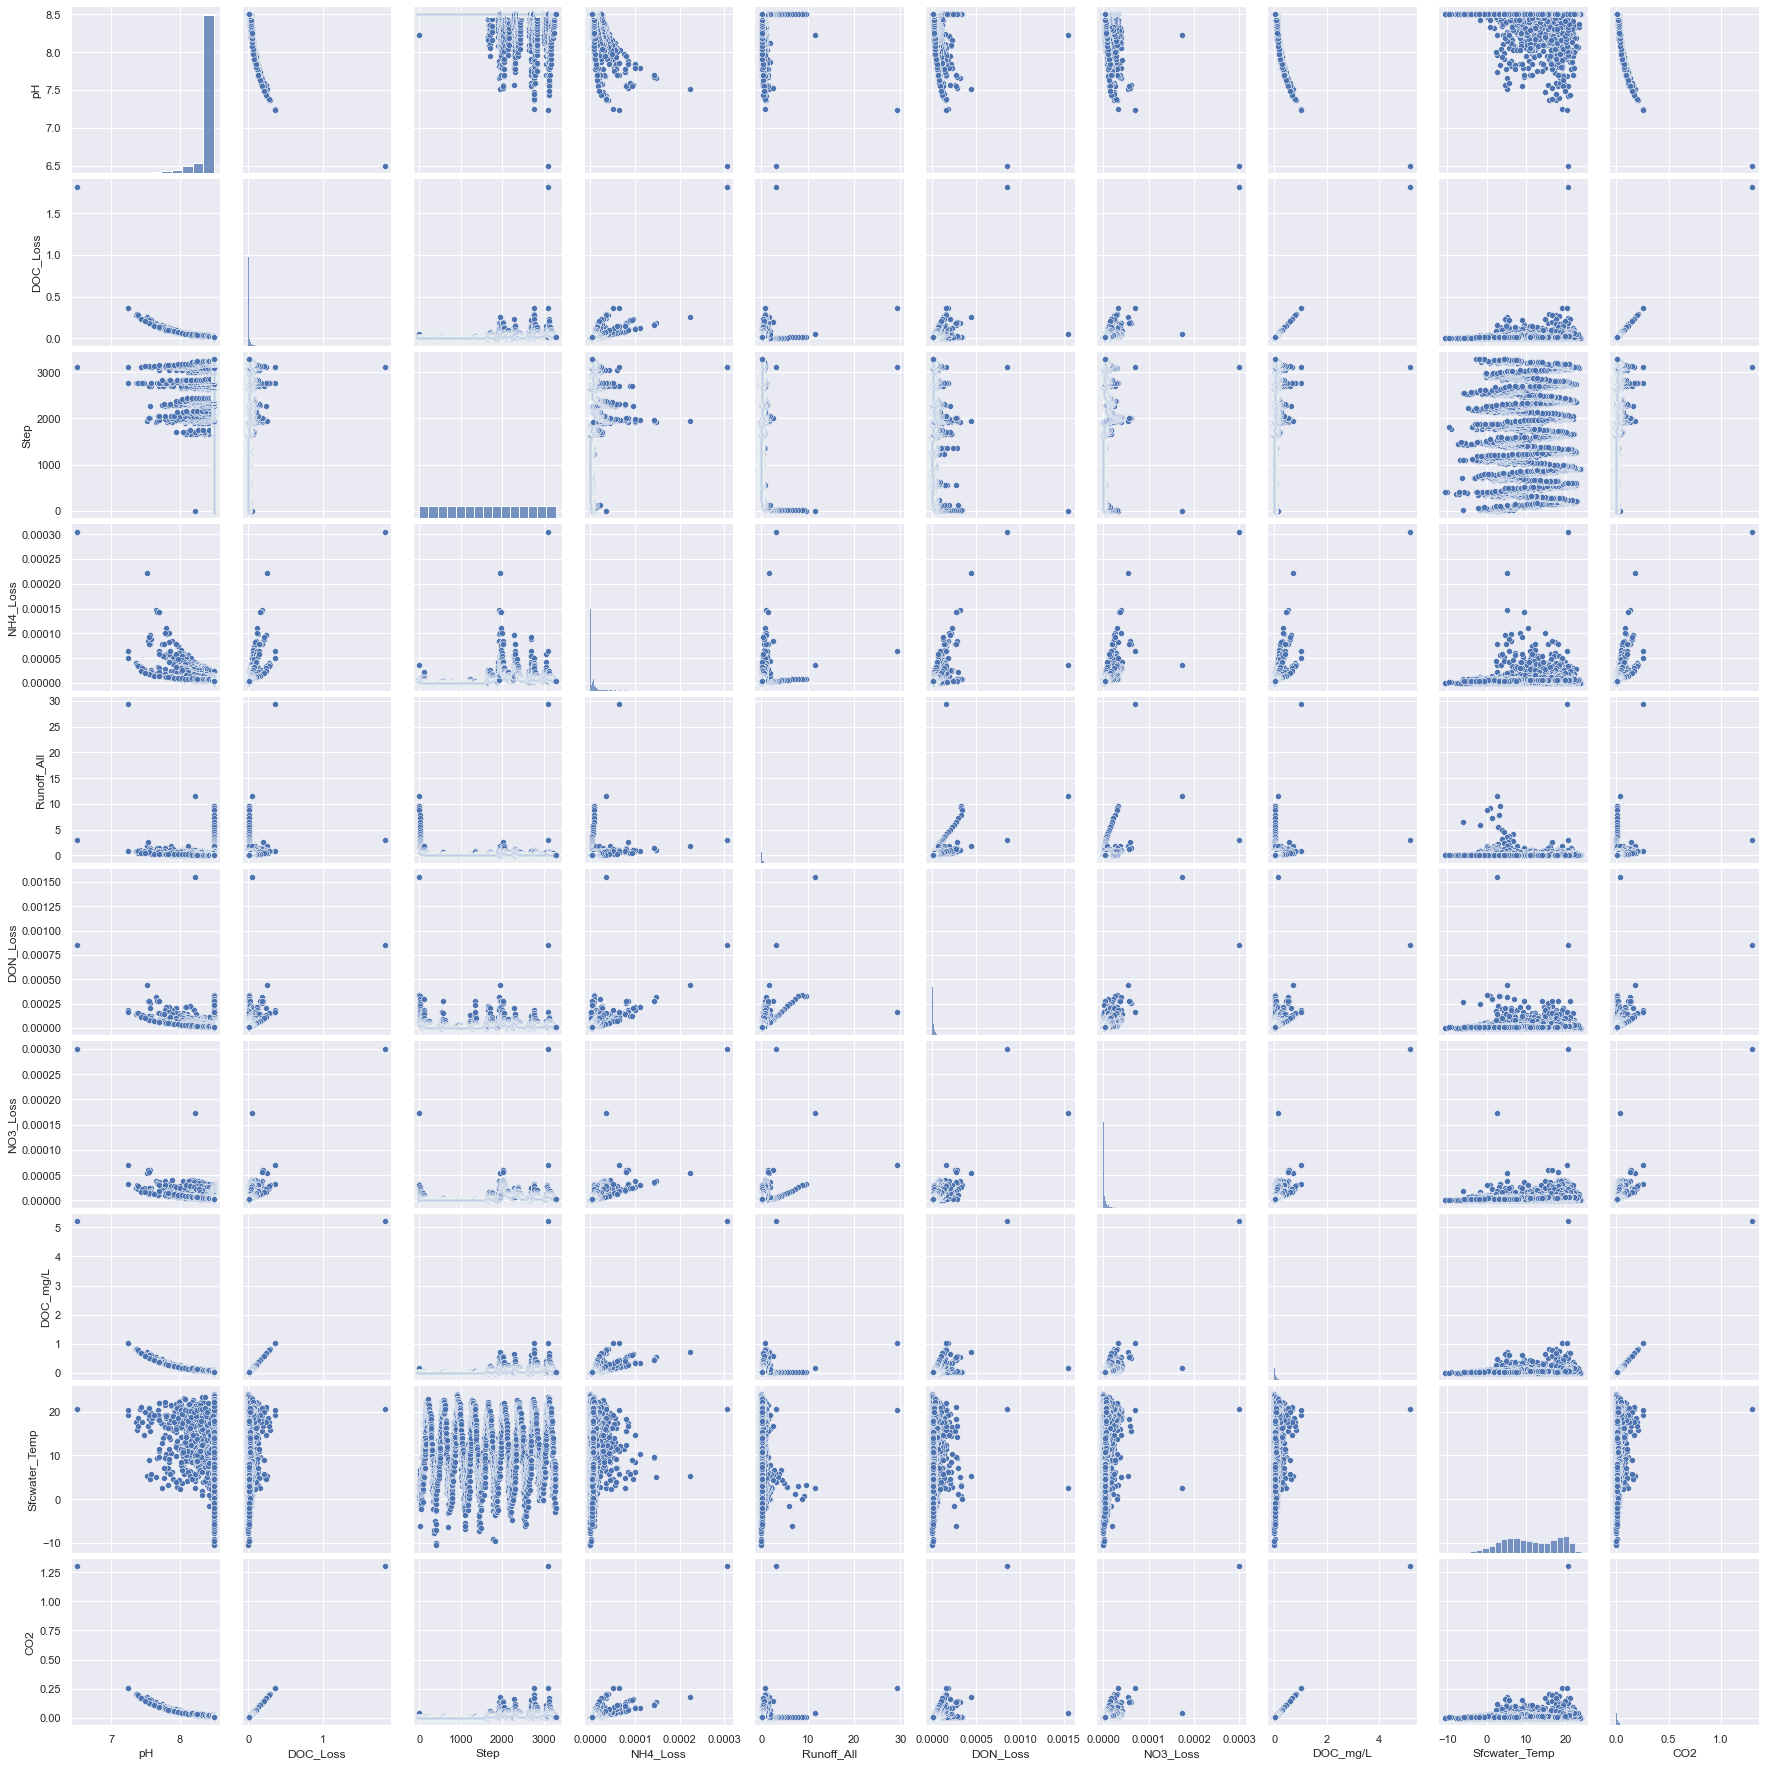

In [37]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

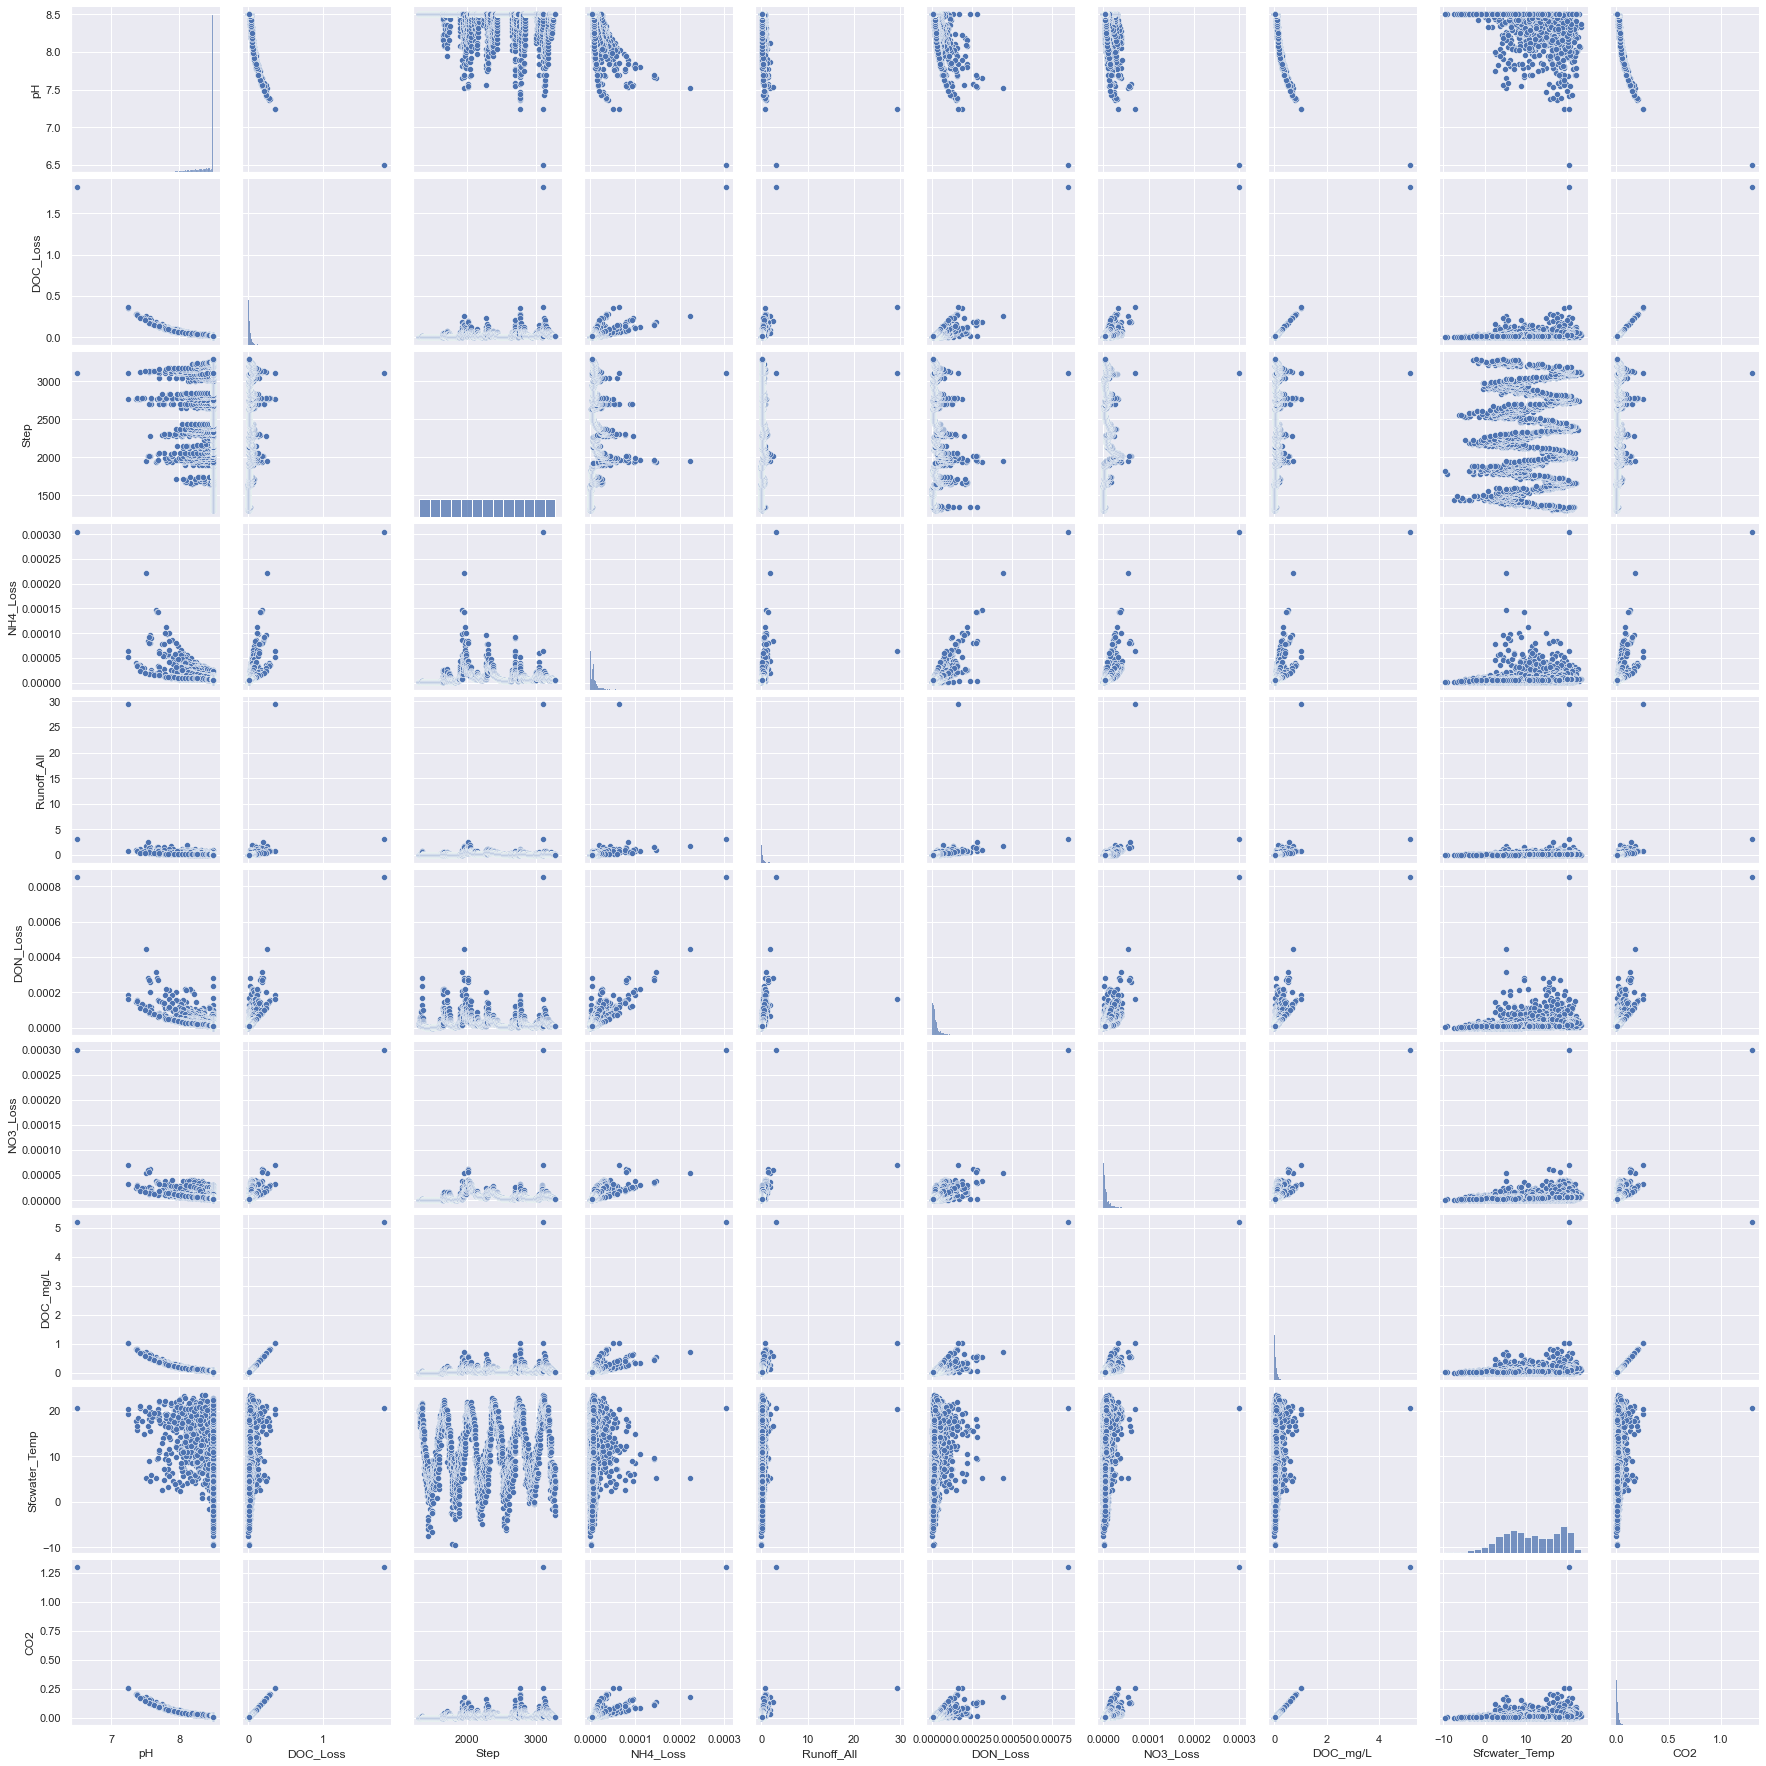

In [38]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

In [39]:
import numpy as np

In [40]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [41]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  3287.000000                             3287.000000   
mean      8.439063                                0.015237   
std       0.163764                                0.042300   
min       6.500062                                0.000029   
10%       8.257485                                0.000075   
25%       8.500000                                0.000193   
50%       8.500000                                0.003675   
75%       8.500000                                0.019601   
90%       8.500000                                0.038432   
max       8.500000                                1.820812   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             6.601599e-06   
std                              1.325734e-05   
min                              6.251203e-08   
10%                              9.847706e-08   
25%                              1.837206e-07   
50%                              2.510358e-06   
75%                              7.793907e-06   
90%                              1.576521e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.192166   
std                                 0.731214   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009843   
50%                                 0.066563   
75%                                 0.182819   
90%                                 0.469919   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.197756e-05   
std                              4.630453e-05   
min                              4.437417e-07   
10%                              1.254997e-06   
25%                              2.938069e-06   
50%                              1.042756e-05   
75%                              2.403923e-05   
90%                              5.031524e-05   
max                              1.554523e-03   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.287000e+03  3287.000000       3287.000000   
mean                             4.429088e-06     0.043535         11.248536   
std                              9.098820e-06     0.120858          6.931090   
min                              6.078645e-10     0.000084        -10.562500   
10%                              2.022193e-08     0.000214          2.262500   
25%                              5.444414e-08     0.000551          5.787500   
50%                              1.405365e-06     0.010501         11.112499   
75%                              5.927934e-06     0.056002         17.712502   
90%                              1.304791e-05     0.109807         20.412498   
max                              2.999136e-04     5.202320         24.087502   

               CO2  
count  3287.000000  
mean      0.010884  
std       0.030214  
min       0.000021  
10%       0.000054  
25%       0.000138  
50%       0.002625  
75%       0.014000  
90%       0.027452  
max       1.300580

In [42]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1978.000000                             1978.000000   
mean      8.398872                                0.024917   
std       0.201199                                0.052309   
min       6.500062                                0.000075   
10%       8.124098                                0.000296   
25%       8.379265                                0.005058   
50%       8.500000                                0.015222   
75%       8.500000                                0.029669   
90%       8.500000                                0.051423   
max       8.500000                                1.820812   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.053342e-05   
std                              1.584812e-05   
min                              8.243388e-08   
10%                              2.330551e-07   
25%                              3.370344e-06   
50%                              6.725040e-06   
75%                              1.147453e-05   
90%                              2.464874e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.205125   
std                                 0.697596   
min                                 0.002260   
10%                                 0.005910   
25%                                 0.051539   
50%                                 0.115309   
75%                                 0.229124   
90%                                 0.496839   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.694855e-05   
std                              3.967425e-05   
min                              9.759431e-07   
10%                              3.485663e-06   
25%                              7.957249e-06   
50%                              1.547219e-05   
75%                              3.133558e-05   
90%                              5.784424e-05   
max                              8.512222e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.978000e+03  1978.000000       1978.000000   
mean                             6.963579e-06     0.071193         11.347358   
std                              1.015898e-05     0.149454          6.693310   
min                              7.904396e-08     0.000215         -9.512501   
10%                              8.898826e-08     0.000844          2.765000   
25%                              1.904871e-06     0.014451          6.162500   
50%                              4.463034e-06     0.043491         11.300000   
75%                              8.709939e-06     0.084769         17.562500   
90%                              1.657799e-05     0.146923         20.037498   
max                              2.999136e-04     5.202320         23.487500   

               CO2  
count  1978.000000  
mean      0.017798  
std       0.037364  
min       0.000054  
10%       0.000211  
25%       0.003613  
50%       0.010873  
75%       0.021192  
90%       0.036731  
max       1.300580

In [43]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  313.0                              313.000000   
mean     8.5                                0.000837   
std      0.0                                0.002104   
min      8.5                                0.000075   
10%      8.5                                0.000085   
25%      8.5                                0.000099   
50%      8.5                                0.000199   
75%      8.5                                0.000712   
90%      8.5                                0.002032   
max      8.5                                0.022092   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             2.808731e-07   
std                              3.906304e-07   
min                              8.243388e-08   
10%                              9.172053e-08   
25%                              1.186765e-07   
50%                              1.764861e-07   
75%                              2.885262e-07   
90%                              4.967477e-07   
max                              4.030671e-06   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069064   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002524   
50%                                 0.004108   
75%                                 0.014629   
90%                                 0.049896   
max                                 0.794726   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.067081e-05   
std                              2.678700e-05   
min                              9.759431e-07   
10%                              1.095221e-06   
25%                              1.272343e-06   
50%                              2.550582e-06   
75%                              8.832146e-06   
90%                              2.546751e-05   
max                              2.804605e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.130000e+02  313.000000        313.000000   
mean                             1.711340e-07    0.002393          9.384385   
std                              2.815744e-07    0.006012          6.408665   
min                              7.904396e-08    0.000215         -7.412499   
10%                              7.985057e-08    0.000242          2.187500   
25%                              8.054734e-08    0.000283          5.037500   
50%                              8.301139e-08    0.000569          8.112500   
75%                              1.400060e-07    0.002033         14.787500   
90%                              3.296985e-07    0.005806         18.687500   
max                              2.944976e-06    0.063120         21.612500   

              CO2  
count  313.000000  
mean     0.000598  
std      0.001503  
min      0.000054  
10%      0.000060  
25%      0.000071  
50%      0.000142  
75%      0.000508  
90%      0.001451  
max      0.015780

In [44]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.379861                                0.029444   
std       0.214033                                0.055862   
min       6.500062                                0.001481   
10%       8.086487                                0.004833   
25%       8.324025                                0.010270   
50%       8.500000                                0.019246   
75%       8.500000                                0.033182   
90%       8.500000                                0.056725   
max       8.500000                                1.820812   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.246077e-05   
std                              1.657978e-05   
min                              6.142470e-07   
10%                              3.300678e-06   
25%                              5.201895e-06   
50%                              7.550189e-06   
75%                              1.298637e-05   
90%                              2.705778e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.239434   
std                                 0.754877   
min                                 0.009465   
10%                                 0.041613   
25%                                 0.077913   
50%                                 0.143882   
75%                                 0.264865   
90%                                 0.530191   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.000030   
std                                  0.000041   
min                                  0.000003   
10%                                  0.000006   
25%                                  0.000010   
50%                                  0.000018   
75%                                  0.000035   
90%                                  0.000064   
max                                  0.000851   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.665000e+03  1665.000000       1665.000000   
mean                             8.240478e-06     0.084126         11.716374   
std                              1.059684e-05     0.159604          6.683227   
min                              3.057608e-07     0.004232         -9.512501   
10%                              1.820136e-06     0.013808          3.012500   
25%                              2.747171e-06     0.029342          6.462500   
50%                              5.546185e-06     0.054988         11.712500   
75%                              1.076684e-05     0.094804         18.012500   
90%                              1.766663e-05     0.162071         20.187500   
max                              2.999136e-04     5.202320         23.487500   

               CO2  
count  1665.000000  
mean      0.021032  
std       0.039901  
min       0.001058  
10%       0.003452  
25%       0.007336  
50%       0.013747  
75%       0.023701  
90%       0.040518  
max       1.300580

In [45]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'})

In [46]:
df_di_a.describe()

pH_1T   Unnamed: 0         Year  \
count  1978.000000  1978.000000  1978.000000   
mean      8.398872  2297.500000  2003.769464   
std       0.201199   571.143736     1.576393   
min       6.500062  1309.000000  2001.000000   
25%       8.379265  1803.250000  2002.000000   
50%       8.500000  2297.500000  2004.000000   
75%       8.500000  2791.750000  2005.000000   
max       8.500000  3286.000000  2006.000000   

       DOC_Loss(gC/day/m2)_Delineated_Average         Step  \
count                             1978.000000  1978.000000   
mean                                 0.024917  2297.500000   
std                                  0.052309   571.143736   
min                                  0.000075  1309.000000   
25%                                  0.005058  1803.250000   
50%                                  0.015222  2297.500000   
75%                                  0.029669  2791.750000   
max                                  1.820812  3286.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.053342e-05   
std                              1.584812e-05   
min                              8.243388e-08   
25%                              3.370344e-06   
50%                              6.725040e-06   
75%                              1.147453e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.205125   
std                                 0.697596   
min                                 0.002260   
25%                                 0.051539   
50%                                 0.115309   
75%                                 0.229124   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.694855e-05   
std                              3.967425e-05   
min                              9.759431e-07   
25%                              7.957249e-06   
50%                              1.547219e-05   
75%                              3.133558e-05   
max                              8.512222e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.978000e+03  1978.000000       1978.000000   
mean                             6.963579e-06     0.071193         11.347358   
std                              1.015898e-05     0.149454          6.693310   
min                              7.904396e-08     0.000215         -9.512501   
25%                              1.904871e-06     0.014451          6.162500   
50%                              4.463034e-06     0.043491         11.300000   
75%                              8.709939e-06     0.084769         17.562500   
max                              2.999136e-04     5.202320         23.487500   

               CO2  Alk_140  
count  1978.000000   1978.0  
mean      0.017798    140.0  
std       0.037364      0.0  
min       0.000054    140.0  
25%       0.003613    140.0  
50%       0.010873    140.0  
75%       0.021192    140.0  
max       1.300580    140.0

In [47]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [48]:
df_di_a_lr

pH_1T         Year  DOC_Loss(gC/day/m2)_Delineated_Average  \
slope     -8.431580e-05     0.002713                            1.974821e-05   
intercept  8.592587e+00  1997.536209                           -2.045402e-02   
rvalue    -2.393478e-01     0.982970                            2.156240e-01   
p-value    3.615783e-27     0.000000                            3.073130e-22   
stderr     7.694418e-06     0.000011                            2.011865e-06   

           Step  NH4_Loss(gN/day/m2)_Delineated_Average  \
slope       1.0                            2.522904e-09   
intercept   0.0                            4.737045e-06   
rvalue      1.0                            9.092187e-02   
p-value     0.0                            5.131459e-05   
stderr      0.0                            6.216362e-10   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                   0.000071   
intercept                               0.042412   
rvalue                                  0.057984   
p-value                                 0.009898   
stderr                                  0.000027   

           DON_Loss(gN/day/m2)_Delineated_Average  \
slope                               -4.553940e-09   
intercept                            3.741122e-05   
rvalue                              -6.555774e-02   
p-value                              3.534647e-03   
stderr                               1.559318e-09   

           NO3_Loss(gN/day/m2)_Delineated_Average      DOC_mg/L  \
slope                                2.069821e-09  5.642345e-05   
intercept                            2.208165e-06 -5.844007e-02   
rvalue                               1.163665e-01  2.156240e-01   
p-value                              2.105928e-07  3.073130e-22   
stderr                               3.974210e-10  5.748187e-06   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758  1.410586e-05      0.0  
intercept          9.606002 -1.461002e-02    140.0  
rvalue             0.064675  2.156240e-01      0.0  
p-value            0.004007  3.073130e-22      1.0  
stderr             0.000263  1.437047e-06      0.0

In [49]:
df_pools_dif.head()

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            4.924307                          179.364744   
1                            4.925284                          179.523730   
2                            4.926286                          179.685625   
3                            4.927284                          179.846649   
4                            4.928269                          179.999629   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.620367                            0.151210   
1                            0.624146                            0.152441   
2                            0.619998                            0.153253   
3                            0.616770                            0.153725   
4                            0.615894                            0.154074   

   Step  Runoff_All(mm/day)_Delineated_Average  
0  1309                               0.033263  
1  1310                               0.049179  
2  1311                               0.059759  
3  1312                               0.043197  
4  1313                               0.033944

In [50]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average'].values;
datetime_series = pd.date_range('1998-01-01', periods=3287, freq='D'); #When no date file is executed from DOC Check
datetime_series[1309:3288];
df_di_a['Date'] = datetime_series[1309:3288].values;

<ipython-input-50-e3b78498b3f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values;
<ipython-input-50-e3b78498b3f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
<ipython-input-50-e3b78498b3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [51]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-51-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [52]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0         Year  \
count  1978.000000  1978.000000  1978.000000   
mean      8.398872  2297.500000  2003.769464   
std       0.201199   571.143736     1.576393   
min       6.500062  1309.000000  2001.000000   
10%       8.124098  1506.700000  2002.000000   
25%       8.379265  1803.250000  2002.000000   
50%       8.500000  2297.500000  2004.000000   
75%       8.500000  2791.750000  2005.000000   
90%       8.500000  3088.300000  2006.000000   
max       8.500000  3286.000000  2006.000000   

       DOC_Loss(gC/day/m2)_Delineated_Average         Step  \
count                             1978.000000  1978.000000   
mean                                 0.024917  2297.500000   
std                                  0.052309   571.143736   
min                                  0.000075  1309.000000   
10%                                  0.000296  1506.700000   
25%                                  0.005058  1803.250000   
50%                                  0.015222  2297.500000   
75%                                  0.029669  2791.750000   
90%                                  0.051423  3088.300000   
max                                  1.820812  3286.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.053342e-05   
std                              1.584812e-05   
min                              8.243388e-08   
10%                              2.330551e-07   
25%                              3.370344e-06   
50%                              6.725040e-06   
75%                              1.147453e-05   
90%                              2.464874e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.205125   
std                                 0.697596   
min                                 0.002260   
10%                                 0.005910   
25%                                 0.051539   
50%                                 0.115309   
75%                                 0.229124   
90%                                 0.496839   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.694855e-05   
std                              3.967425e-05   
min                              9.759431e-07   
10%                              3.485663e-06   
25%                              7.957249e-06   
50%                              1.547219e-05   
75%                              3.133558e-05   
90%                              5.784424e-05   
max                              8.512222e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.978000e+03  1978.000000       1978.000000   
mean                             6.963579e-06     0.071193         11.347358   
std                              1.015898e-05     0.149454          6.693310   
min                              7.904396e-08     0.000215         -9.512501   
10%                              8.898826e-08     0.000844          2.765000   
25%                              1.904871e-06     0.014451          6.162500   
50%                              4.463034e-06     0.043491         11.300000   
75%                              8.709939e-06     0.084769         17.562500   
90%                              1.657799e-05     0.146923         20.037498   
max                              2.999136e-04     5.202320         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1978.000000   1978.0  1978.000000  1978.000000  1978.000000  
mean      0.017798    140.0  1847.930416     3.677796     1.116060  
std       0.037364      0.0  1187.898156     1.734313     0.810944  
min       0.000054    140.0   179.3

In [53]:
df_di_a.head()

pH_1T  Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  Step  \
1309    8.5        1309  2001                                0.001380  1309   
1310    8.5        1310  2001                                0.001843  1310   
1311    8.5        1311  2001                                0.002381  1311   
1312    8.5        1312  2001                                0.001804  1312   
1313    8.5        1313  2001                                0.001441  1313   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   

      NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                            2.677494e-07  0.003941         20.112500   
1310                            3.472516e-07  0.005267         19.737500   
1311                            4.345665e-07  0.006804         19.962502   
1312                            3.428827e-07  0.005153         19.812500   
1313                            2.838185e-07  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1309  0.000985      140   Prefire    Meets  179.364744  0.620367  0.151210   
1310  0.001317      140   Prefire    Meets  179.523730  0.624146  0.152441   
1311  0.001701      140   Prefire    Meets  179.685625  0.619998  0.153253   
1312  0.001288      140   Prefire    Meets  179.846649  0.616770  0.153725   
1313  0.001029      140   Prefire    Meets  179.999629  0.615894  0.154074   

           Date  
1309 2001-08-02  
1310 2001-08-03  
1311 2001-08-04  
1312 2001-08-05  
1313 2001-08-06

In [54]:
#Defining all as Meets so that the .loc of the criteria mask will set the criteria to exceeds
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [55]:
#Setting EPA Criteria Mask for those days where exceedance occured for NH4 or NO3 based on pH calculation
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [56]:
#Those that 'exceed' drink water standards
criteria_mask
#export criteria mask to csv
#criteria_mask.to_csv('11192120APR21A_WQX_Exceedance.csv')

In [57]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [58]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [59]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC20APR21a_exceed_allstats.csv')

In [60]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC20APR21a_exceed_pfstats.csv')

In [61]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC20APR21a_exceed_pofstats.csv')

In [62]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  Step  \
1309    8.5        1309  2001                                0.001380  1309   
1310    8.5        1310  2001                                0.001843  1310   
1311    8.5        1311  2001                                0.002381  1311   
1312    8.5        1312  2001                                0.001804  1312   
1313    8.5        1313  2001                                0.001441  1313   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000018   
1310                                0.000024   
1311                                0.000031   
1312                                0.000023   
1313                                0.000019   

      NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                            2.677494e-07  0.003941         20.112500   
1310                            3.472516e-07  0.005267         19.737500   
1311                            4.345665e-07  0.006804         19.962502   
1312                            3.428827e-07  0.005153         19.812500   
1313                            2.838185e-07  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1309  0.000985      140   Prefire  Exceeds  179.364744  0.620367  0.151210   
1310  0.001317      140   Prefire  Exceeds  179.523730  0.624146  0.152441   
1311  0.001701      140   Prefire  Exceeds  179.685625  0.619998  0.153253   
1312  0.001288      140   Prefire  Exceeds  179.846649  0.616770  0.153725   
1313  0.001029      140   Prefire  Exceeds  179.999629  0.615894  0.154074   

           Date  
1309 2001-08-02  
1310 2001-08-03  
1311 2001-08-04  
1312 2001-08-05  
1313 2001-08-06

In [63]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [64]:
#Brush Creek Pre-fire linear #.to_csv('111921BC20APR21a_pflr.csv')regression
bc_pf_lr;
bc_pf_lr#.to_csv('111921BC20APR21a_pflr.csv')

In [65]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire'] 
bc_pof.head()
#bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  Unnamed: 0  Year  DOC_Loss(gC/day/m2)_Delineated_Average  Step  \
1622    8.5        1622  2002                                0.001802  1622   
1623    8.5        1623  2002                                0.001941  1623   
1624    8.5        1624  2002                                0.002147  1624   
1625    8.5        1625  2002                                0.002012  1625   
1626    8.5        1626  2002                                0.001929  1626   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1622                            6.142470e-07   
1623                            7.453474e-07   
1624                            8.864077e-07   
1625                            8.993737e-07   
1626                            9.234112e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1622                               0.040016   
1623                               0.043347   
1624                               0.044780   
1625                               0.040436   
1626                               0.037172   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1622                                0.000021   
1623                                0.000022   
1624                                0.000024   
1625                                0.000021   
1626                                0.000020   

      NO3_Loss(gN/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1622                            3.057608e-07  0.005148         17.262500   
1623                            3.503817e-07  0.005546         15.687500   
1624                            3.762763e-07  0.006133         18.387500   
1625                            3.926479e-07  0.005748         16.662500   
1626                            4.196839e-07  0.005512         15.012501   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1622  0.001287      140  Postfire  Exceeds  200.666744  0.802159  0.221588   
1623  0.001387      140  Postfire  Exceeds  204.099448  0.839415  0.224116   
1624  0.001533      140  Postfire  Exceeds  208.875645  0.872367  0.225035   
1625  0.001437      140  Postfire  Exceeds  212.761056  0.905659  0.228190   
1626  0.001378      140  Postfire  Exceeds  215.888999  0.937144  0.231756   

           Date  
1622 2002-06-11  
1623 2002-06-12  
1624 2002-06-13  
1625 2002-06-14  
1626 2002-06-15

In [66]:
bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0', 'Year', 'Step'})

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.379861                                0.029444   
std       0.214033                                0.055862   
min       6.500062                                0.001481   
10%       8.086487                                0.004833   
25%       8.324025                                0.010270   
50%       8.500000                                0.019246   
75%       8.500000                                0.033182   
90%       8.500000                                0.056725   
max       8.500000                                1.820812   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.246077e-05   
std                              1.657978e-05   
min                              6.142470e-07   
10%                              3.300678e-06   
25%                              5.201895e-06   
50%                              7.550189e-06   
75%                              1.298637e-05   
90%                              2.705778e-05   
max                              3.049862e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.239434   
std                                 0.754877   
min                                 0.009465   
10%                                 0.041613   
25%                                 0.077913   
50%                                 0.143882   
75%                                 0.264865   
90%                                 0.530191   
max                                29.388712   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.000030   
std                                  0.000041   
min                                  0.000003   
10%                                  0.000006   
25%                                  0.000010   
50%                                  0.000018   
75%                                  0.000035   
90%                                  0.000064   
max                                  0.000851   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.665000e+03  1665.000000       1665.000000   
mean                             8.240478e-06     0.084126         11.716374   
std                              1.059684e-05     0.159604          6.683227   
min                              3.057608e-07     0.004232         -9.512501   
10%                              1.820136e-06     0.013808          3.012500   
25%                              2.747171e-06     0.029342          6.462500   
50%                              5.546185e-06     0.054988         11.712500   
75%                              1.076684e-05     0.094804         18.012500   
90%                              1.766663e-05     0.162071         20.187500   
max                              2.999136e-04     5.202320         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1665.000000   1665.0  1665.000000  1665.000000  1665.000000  
mean      0.021032    140.0  2159.625500     4.190508     1.291306  
std       0.039901      0.0  1030.629792     1.378264     0.766230  
min       0.001058    140.0   200.666744     0.802159     0.221588  
10%       0.003452    140.0   793.431867     2.494459     0.594593  
25%       0.007336    140.0  1290.524030     3.326011     0.663529  
50%       0.013747    140.0  2298.944789     4.015927     1.080691  
75%       0.023701    140.0  3121.081892     5.180336     1.850302  
90%       0.040518    140.0  3552.989816     6.125868     2.758764  
max       1.300580    140.0  3908.251256     7.343117     3.413058

In [67]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [68]:
bc_pof_lr;
bc_pof_lr#.to_csv('111921BC20APR21a_poflr.csv')

In [69]:
 #Oneway ANOVA between pre and post fire nitrates
stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=653.5638517178896, pvalue=8.871741416213458e-125)

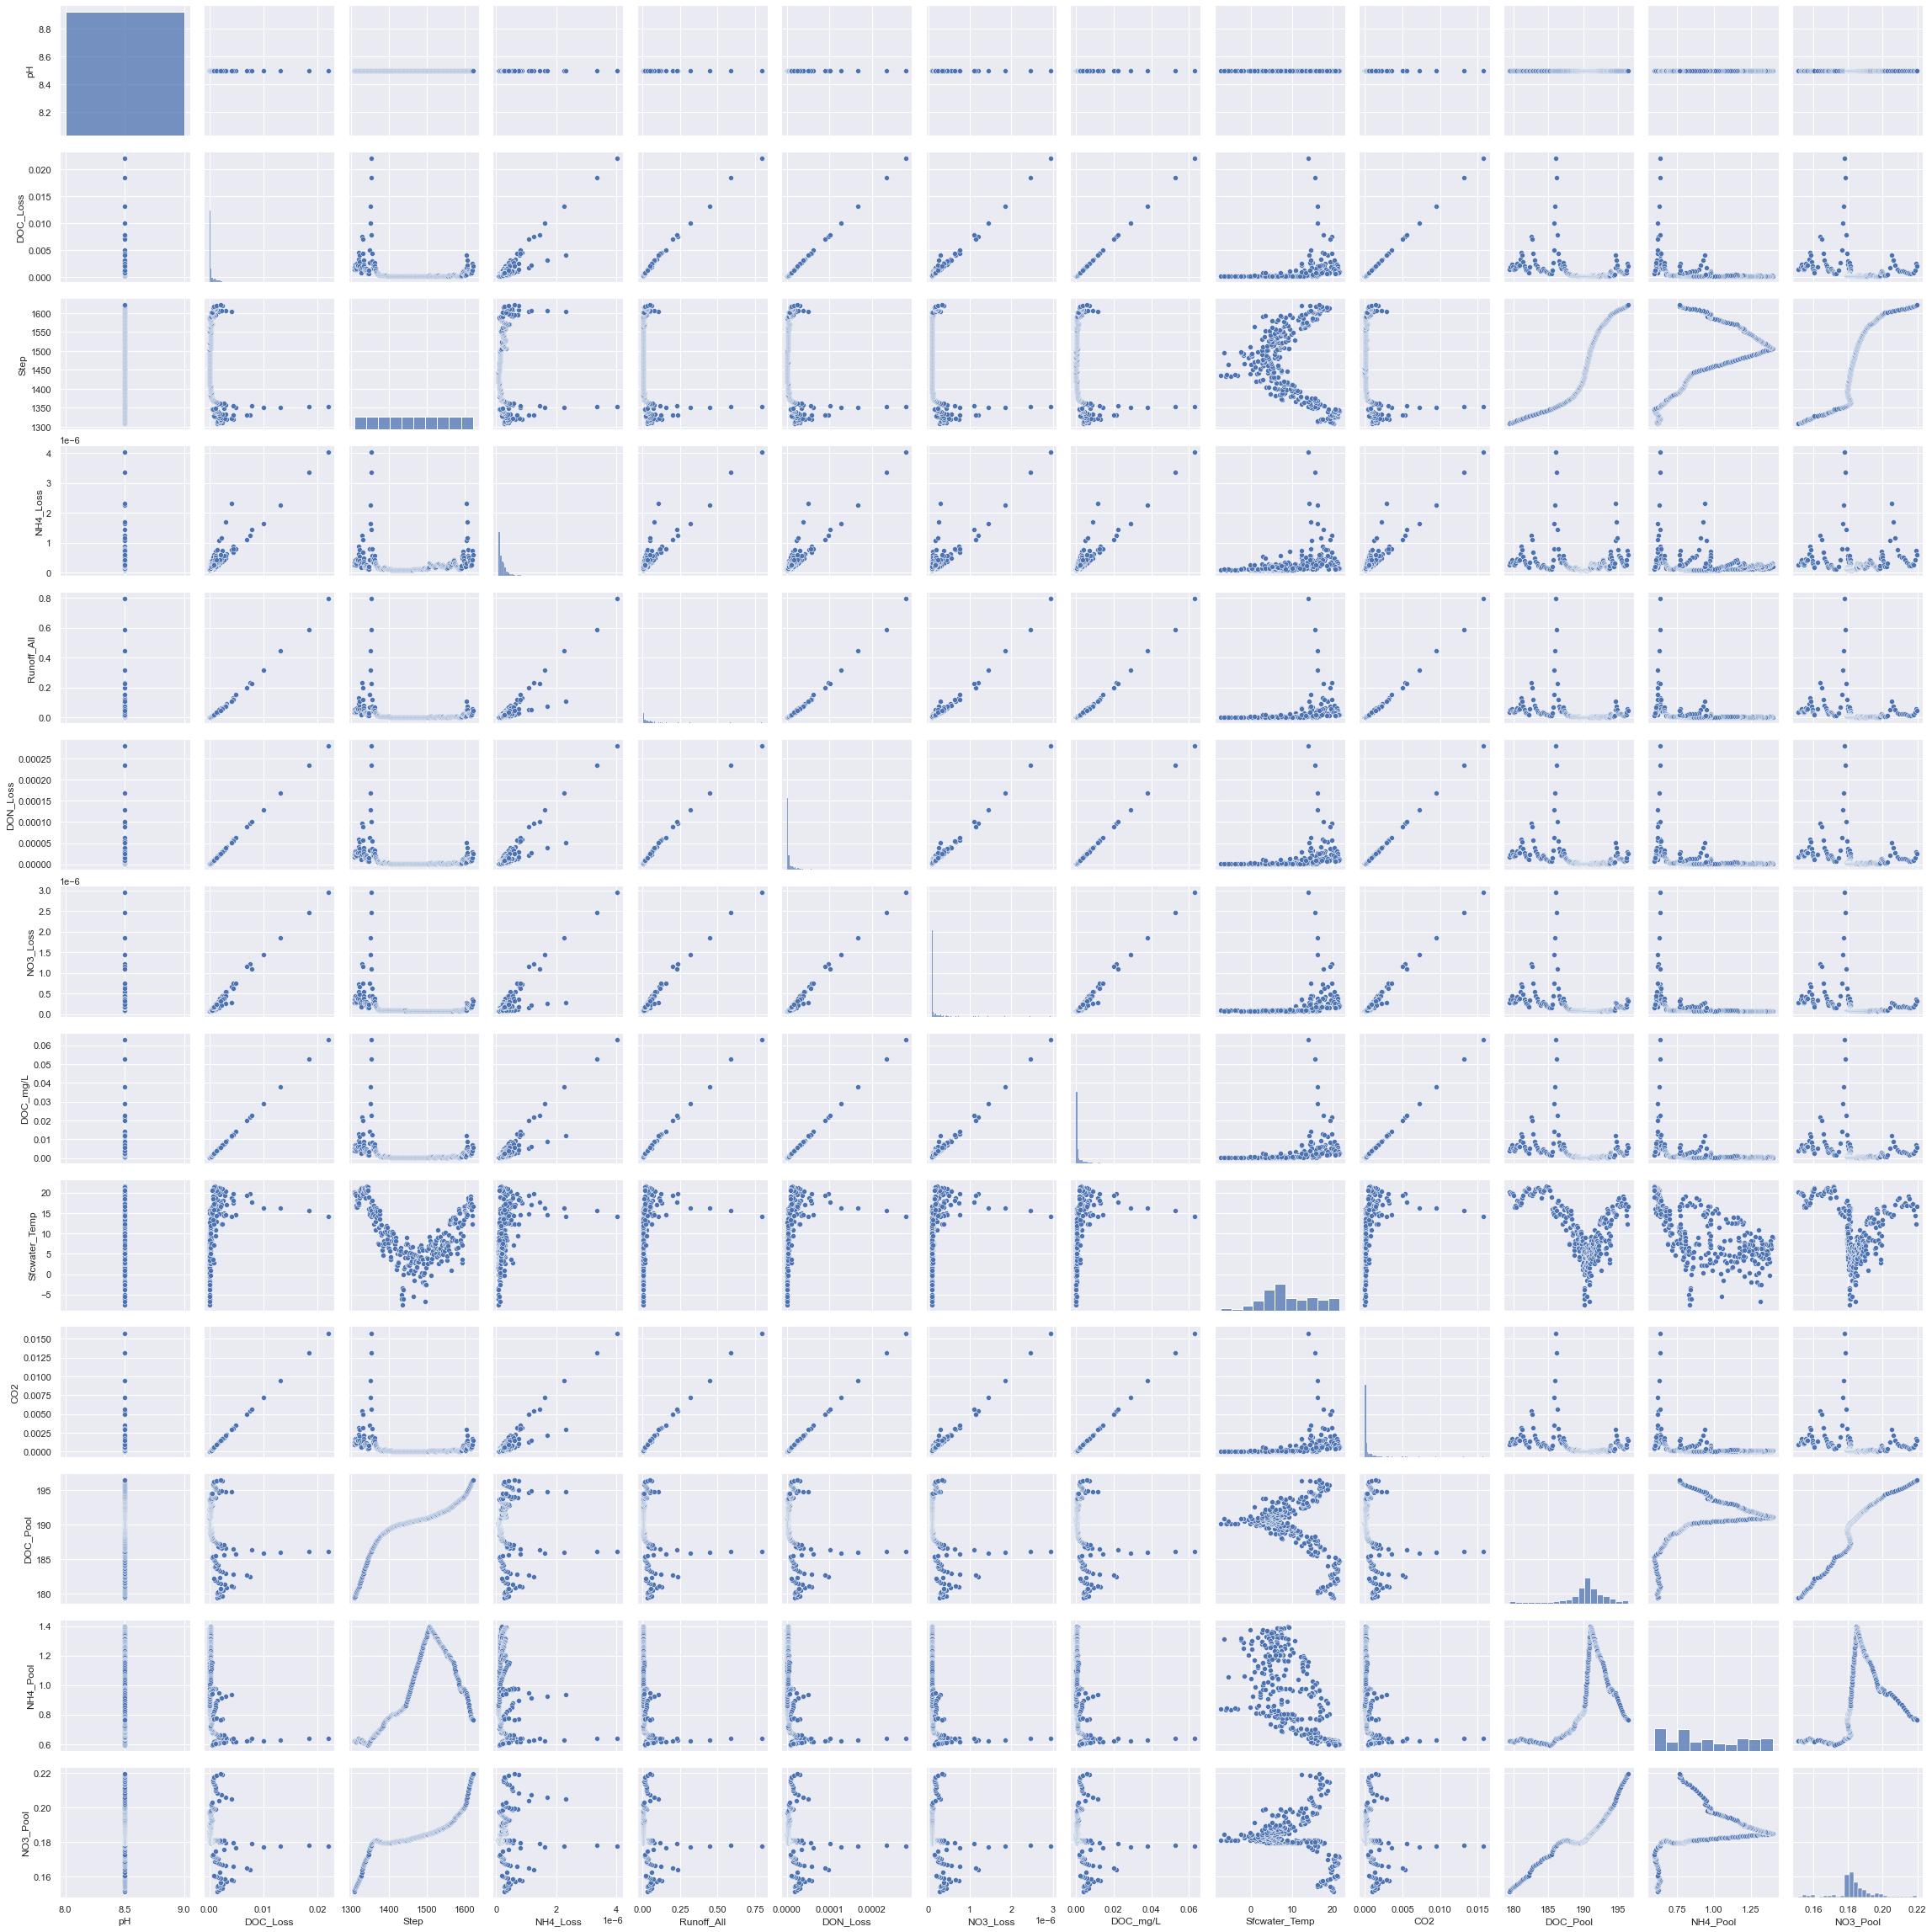

In [70]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

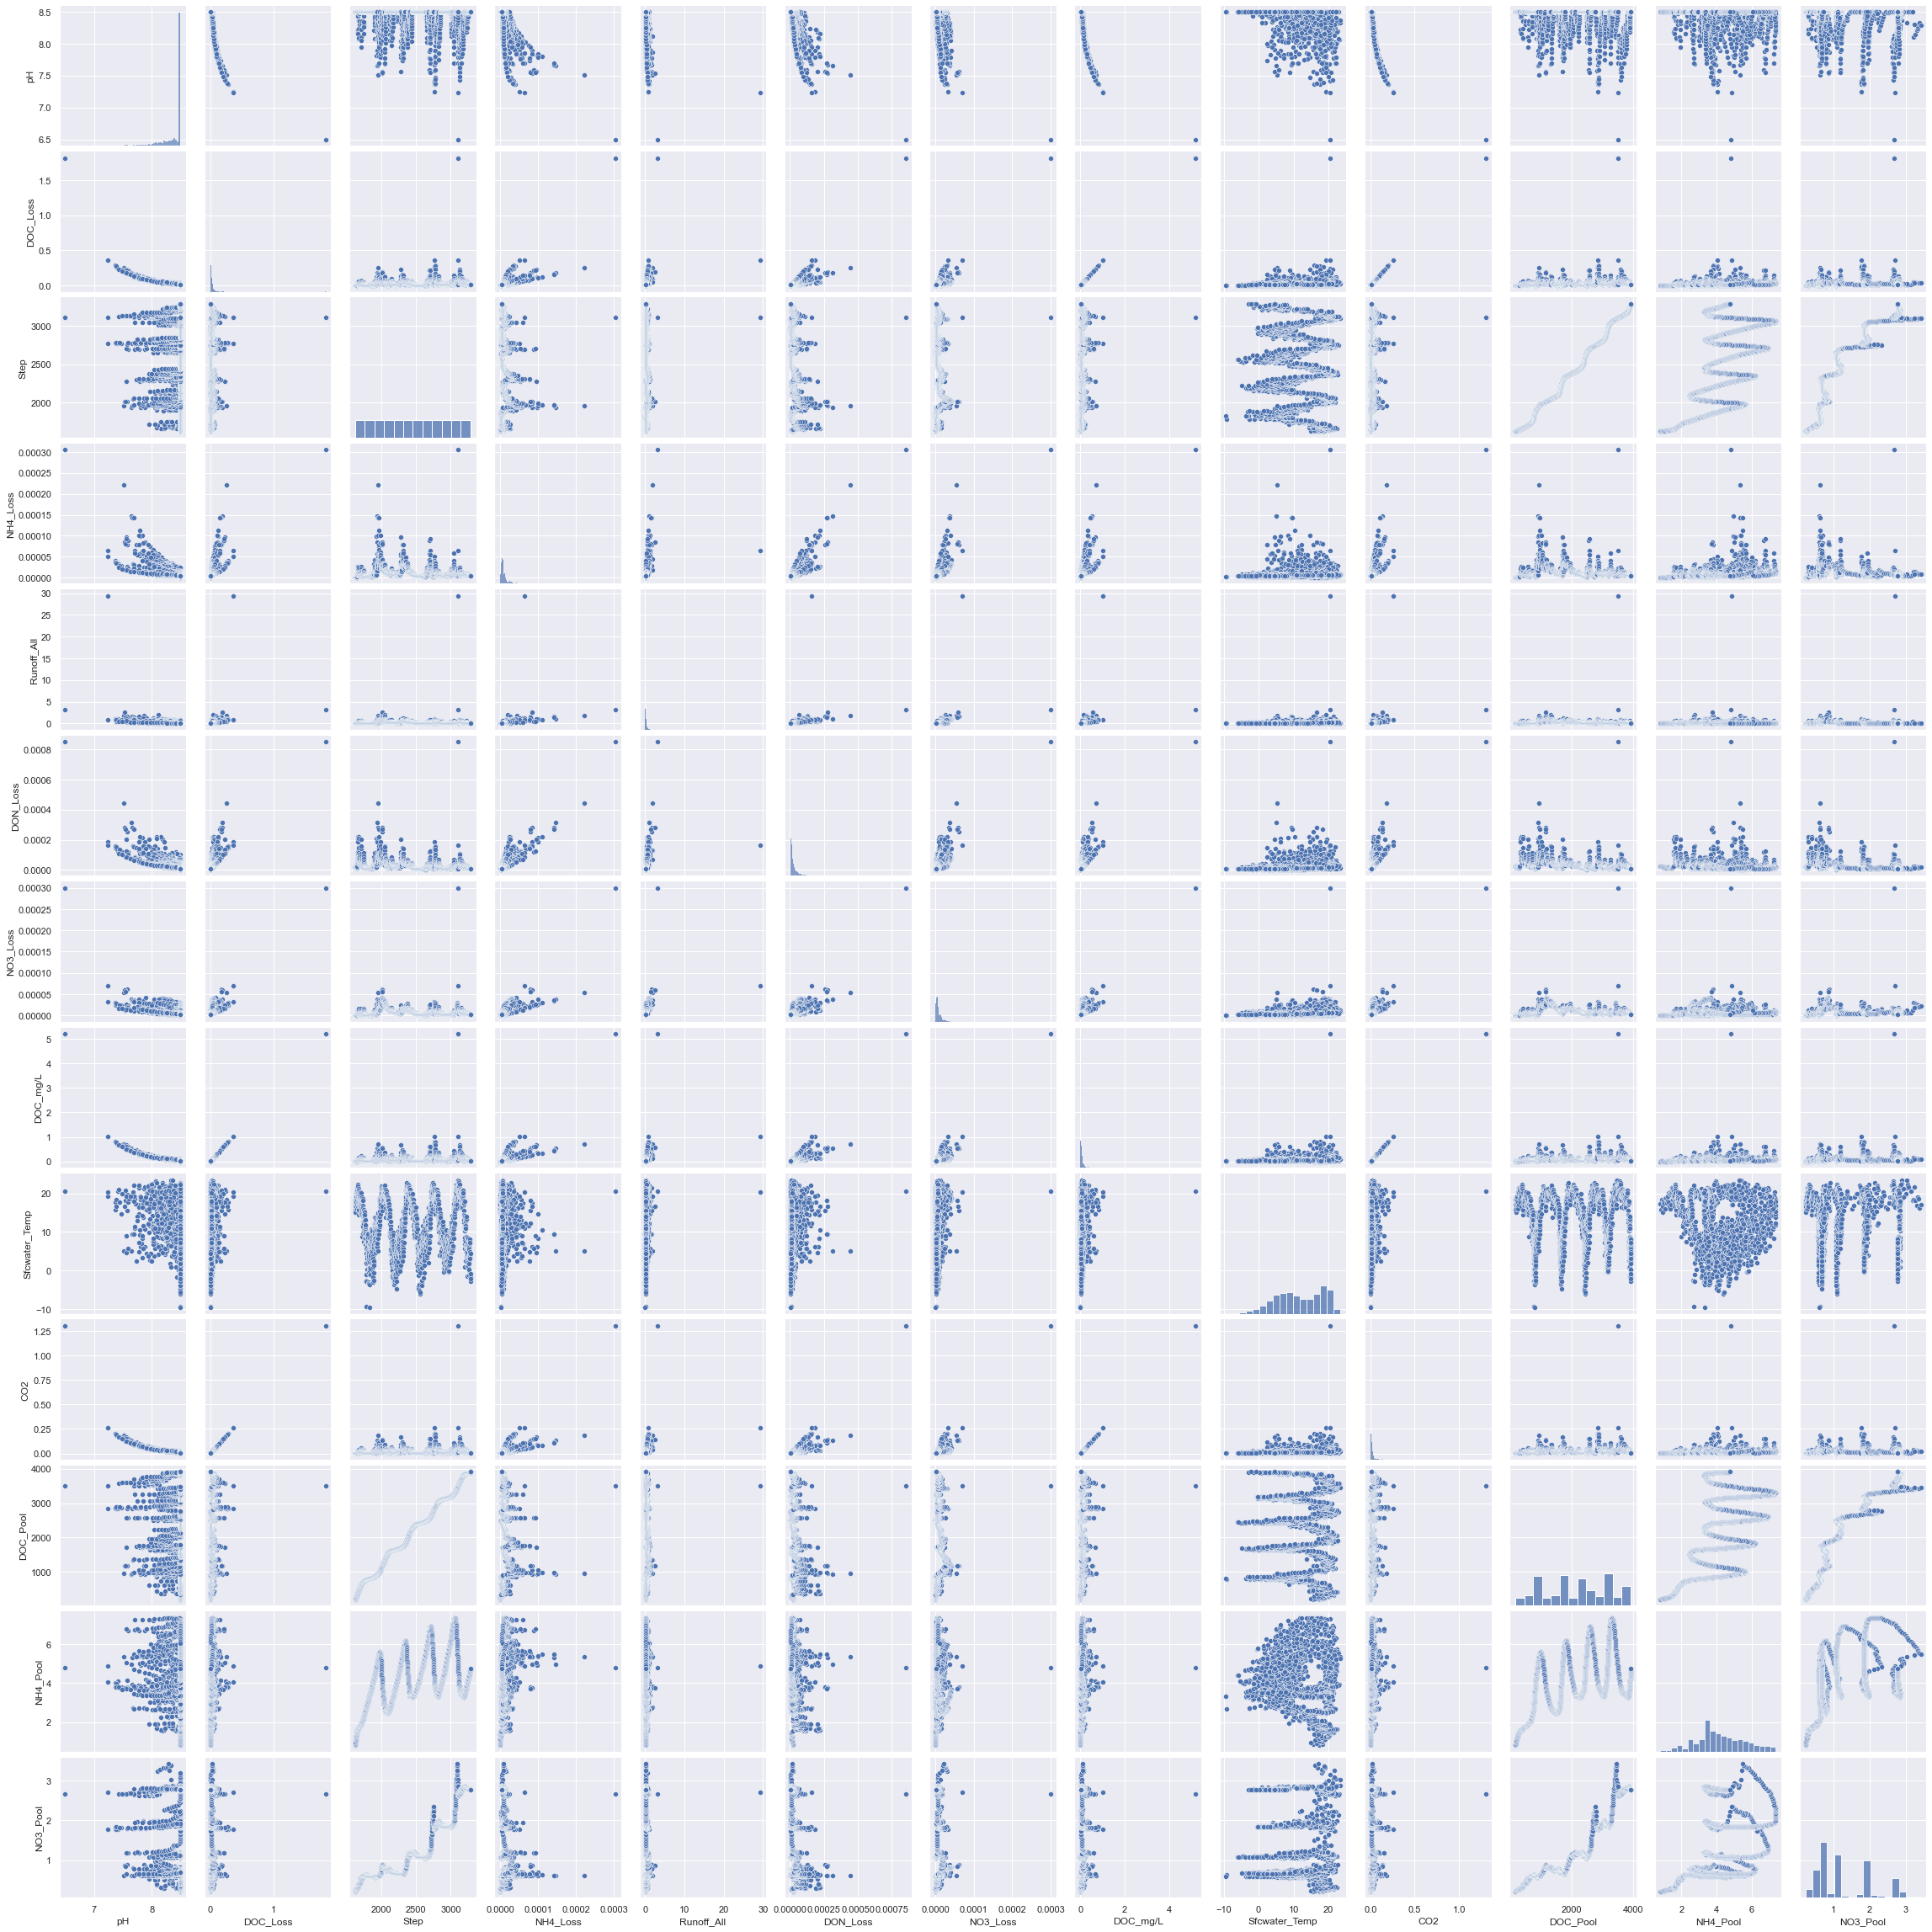

In [71]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

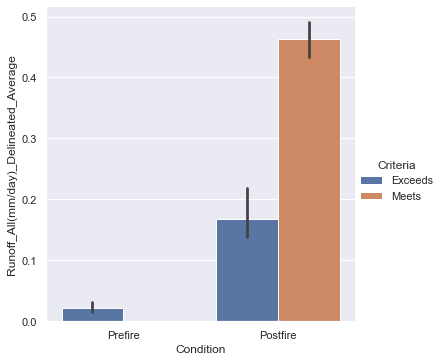

In [72]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

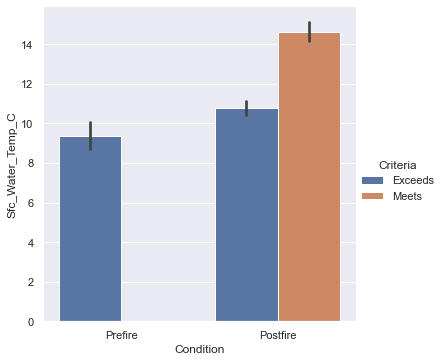

In [73]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

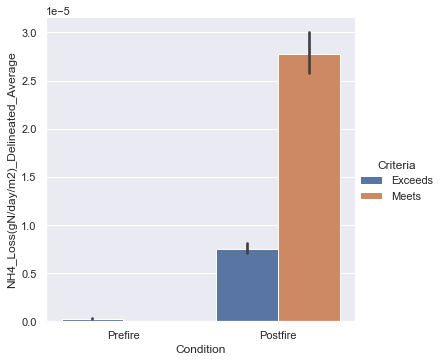

In [74]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

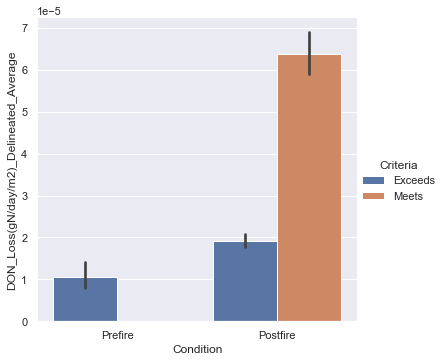

In [75]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

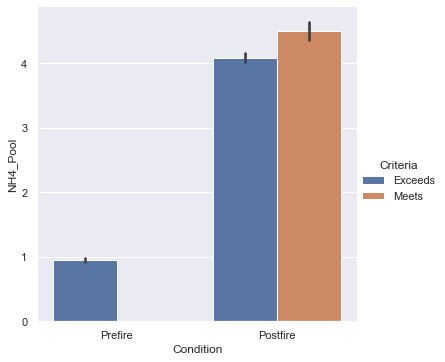

In [76]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

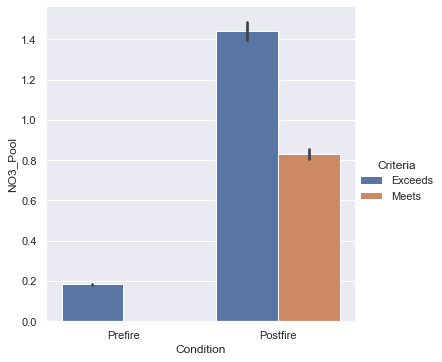

In [77]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

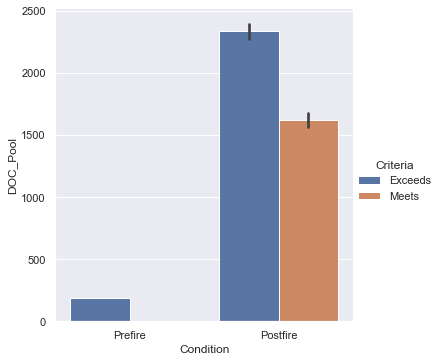

In [78]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

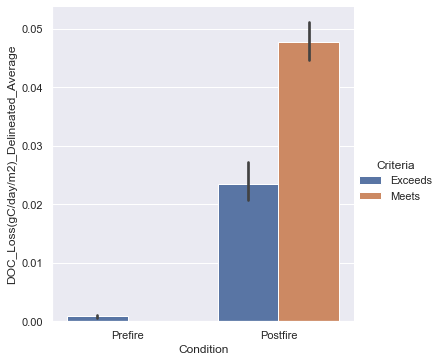

In [79]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [80]:
df_di_a#.to_csv('111921_BC20APR21A_WQX_All_di.csv')

In [81]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [82]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


In [83]:
#data_df.head()